In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [57]:
train_df = pd.read_csv('train1.csv')

In [58]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

# Exploratory Data Analysis (EDA):

In [59]:
train_df.shape

(1168, 81)

In [109]:
pd.set_option('display.max_rows', 81)

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [62]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [63]:
#checking column
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
#checking for null values
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

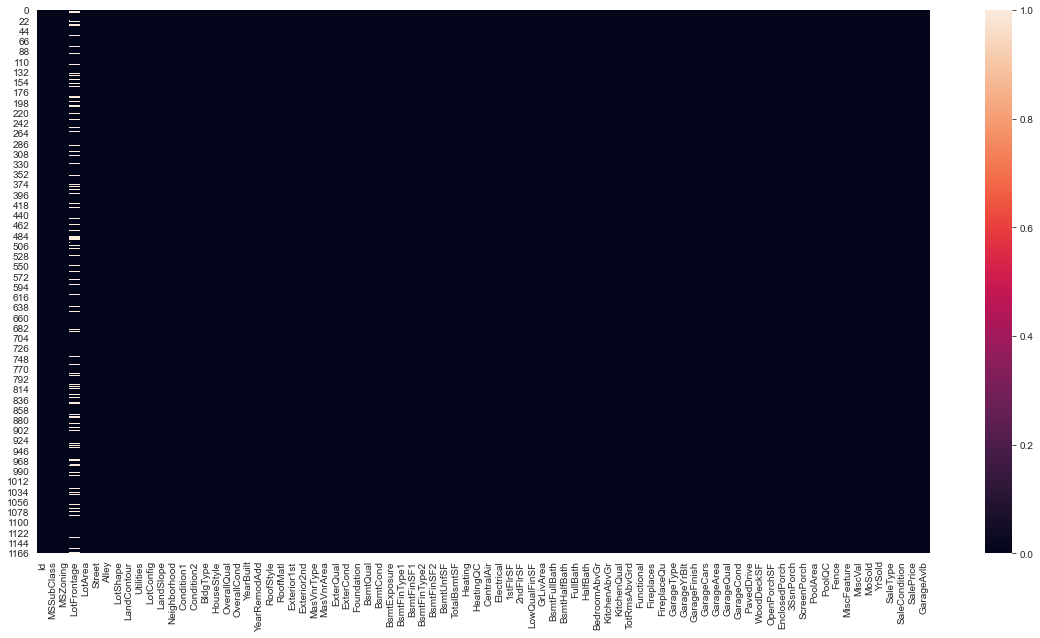

In [211]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isnull())
plt.show()

# NO null values present in dataset.

In [65]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

# Statistical Summary:

In [66]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

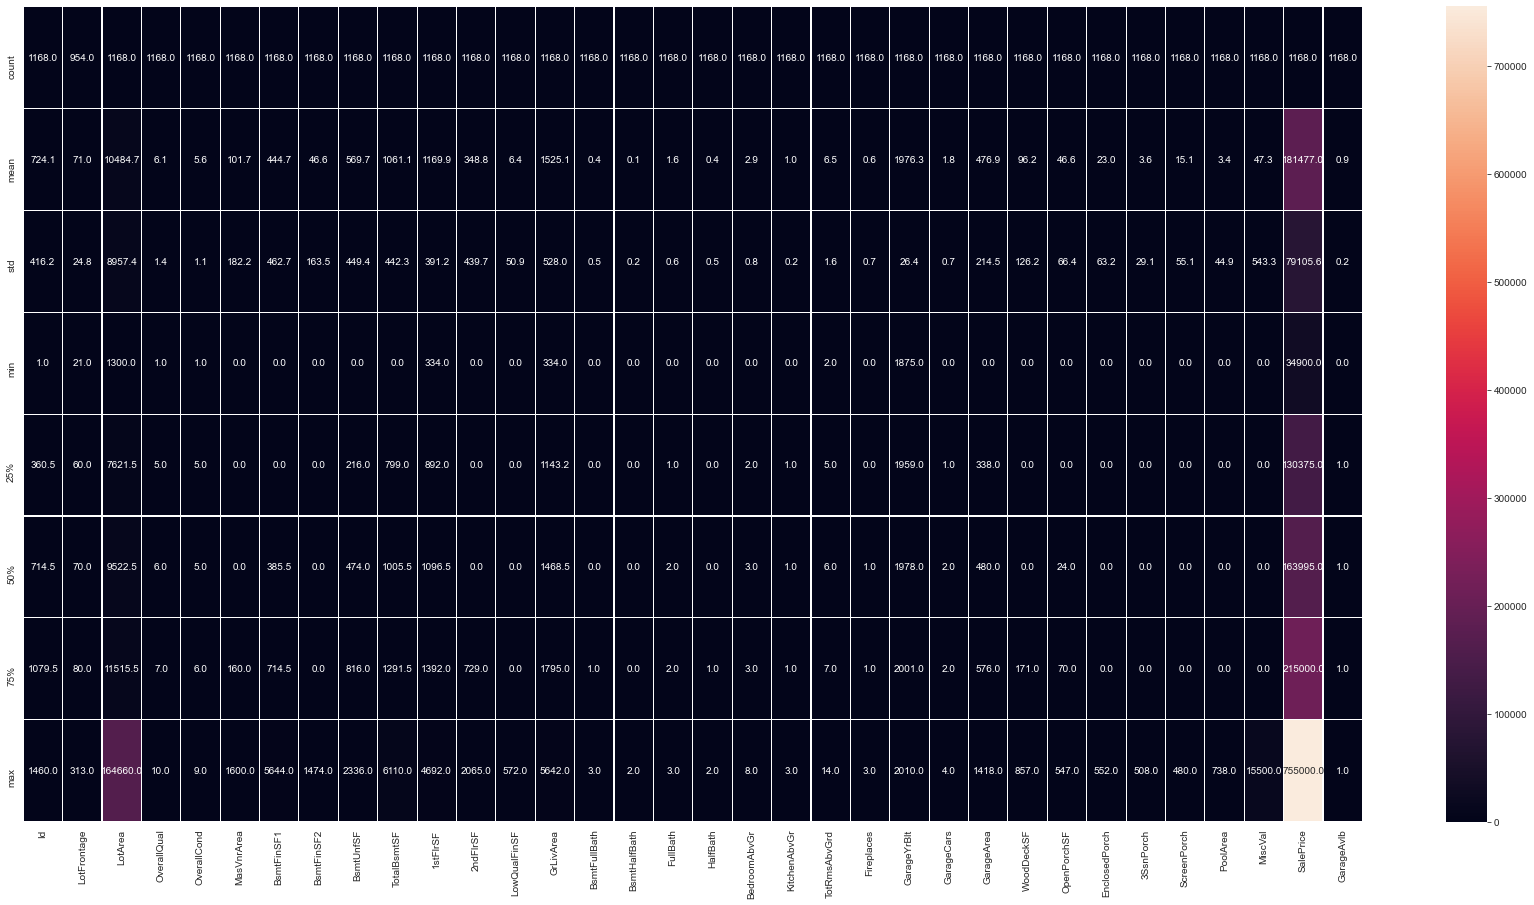

In [212]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Data Preprocessing:

In [67]:
train_df[train_df['Alley']=='NA']

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [68]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [69]:
train_df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [70]:
train_df['Alley'].fillna('NA',inplace=True)

In [71]:
train_df[train_df['Alley'].isnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [72]:
train_df[train_df['Alley']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave    NA      IR1   
1      889          20       RL         95.0    15865   Pave    NA      IR1   
2      793          60       RL         92.0     9920   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL          NaN    16635   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1161  1301          60       RL          NaN    10762   Pave    NA      IR1   
1163   289          20       RL          NaN     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1167   617          60       RL          NaN     7861   Pave    NA      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1161         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1161      5   2009        WD         Normal     225000  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1167      6   2006        WD         Normal     183200  

[1091 rows x 81 columns]

In [73]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [74]:
train_df['FireplaceQu'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [75]:
train_df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [76]:
train_df['FireplaceQu'].fillna('NA',inplace=True)

In [77]:
train_df['FireplaceQu'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Ex', 'Po'], dtype=object)

In [78]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [79]:
train_df['FireplaceQu'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Ex', 'Po'], dtype=object)

In [80]:
train_df['FireplaceQu'].value_counts()

NA    551
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [81]:
train_df['FireplaceQu'].fillna('NA',inplace=True)

In [82]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [83]:
train_df['PoolQC'].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [84]:
train_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [85]:
train_df['PoolQC'].fillna('NA',inplace=True)

In [86]:
train_df['PoolQC'].unique()

array(['NA', 'Ex', 'Gd', 'Fa'], dtype=object)

In [87]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [88]:
train_df['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [89]:
train_df['MiscFeature'].fillna('NA',inplace=True)

In [90]:
train_df['MiscFeature'].unique()

array(['NA', 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

Observations:


    
    The valid values of the 'MiscFeature'are:
 
 
 Elev    Elevator
 
 
 Gar2    2nd Garage (if not described in garage section)
 
 
 Othr    Other
 
 
 Shed    Shed (over 100 SF)
 
 
 TenC    Tennis Court
 
 
 NA      None

    
    1.Both train and test files do not contain 'Elev' and 'NA' examples.

    
    2.Since there are no examples for 'Elev', I am going to assume that the missing values are 'NA'.

In [91]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [92]:
train_df['PoolQC'].unique()

array(['NA', 'Ex', 'Gd', 'Fa'], dtype=object)

In [93]:
train_df['PoolQC'].value_counts()

NA    1161
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [94]:
train_df['Fence'].fillna('NA',inplace=True)

In [95]:
train_df['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [96]:
train_df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

Observations:


    Valid values for 'GarageType' are: GarageType: Garage location


            2Types      More than one type of garage

            Attchd      Attached to home

            Basment     Basement Garage

            BuiltIn     Built-In (Garage part of house - typically has room above garage)

            CarPort     Car Port

            Detchd      Detached from home

            NA          No Garage

            
    Assuming that the missing values are because there are no Garage

In [97]:
train_df['GarageType'].fillna('NA',inplace=True)

In [98]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [99]:
train_df['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

In [100]:
train_df['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1908.0     1
1900.0     1
1906.0     1
1927.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [101]:
train_df[train_df['GarageYrBlt'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48     534          20       RL         50.0     5000   Pave    NA      Reg   
72     126         190       RM         60.0     6780   Pave    NA      Reg   
74    1327          30       RH         70.0     4270   Pave    NA      Reg   
105    141          20       RL         70.0    10500   Pave    NA      Reg   
116    149          20       RL         63.0     7500   Pave    NA      Reg   
123    308          50       RM          NaN     7920   Pave  Grvl      IR1   
127    166         190       RL         62.0    10106   Pave    NA      Reg   
149    827          45       RM         50.0     6130   Pave    NA      Reg   
180   1326          30       RM         40.0     3636   Pave    NA      Reg   
184    536         190       RL         70.0     7000   Pave    NA      Reg   
197   1235          70       RH         55.0     8525   Pave    NA      Reg   
227    164          45       RL         55.0     5500   Pave    NA      Reg   
314   1144          20       RL          NaN     9000   Pave    NA      Reg   
327    465          20       RL         60.0     8430   Pave    NA      Reg   
333   1010          50       RL         60.0     6000   Pave    NA      Reg   
378    922          90       RL         67.0     8777   Pave    NA      Reg   
396    969          50       RM         50.0     5925   Pave    NA      Reg   
420    435         180       RM         21.0     1890   Pave    NA      Reg   
429    156          50       RL         60.0     9600   Pave    NA      Reg   
468    387          50       RL         58.0     8410   Pave    NA      Reg   
474    394          30       RL          NaN     7446   Pave    NA      Reg   
491   1012          90       RL         75.0     9825   Pave    NA      Reg   
510    637          30       RM         51.0     6120   Pave    NA      Reg   
537   1450         180       RM         21.0     1533   Pave    NA      Reg   
545   1324          30       RL         50.0     5330   Pave    NA      Reg   
546    977          30       RL         51.0     5900   Pave    NA      IR1   
548    639          30       RL         67.0     8777   Pave    NA      Reg   
584   1454          20       RL         90.0    17217   Pave    NA      Reg   
585    211          30       RL         67.0     5604   Pave    NA      Reg   
597   1132          20       RL         63.0    10712   Pave    NA      Reg   
614    636         190       RH         60.0    10896   Pave  Pave      Reg   
615    251          30       RL         55.0     5350   Pave    NA      IR1   
636    751          50       RM         55.0     8800   Pave  Grvl      Reg   
655   1138          50       RL         54.0     6342   Pave    NA      Reg   
656   1220         160       RM         21.0     1680   Pave    NA      Reg   
664    844          90       RL         80.0     8000   Pave    NA      Reg   
683    785          75       RM         35.0     6300   Pave  Grvl      Reg   
696    100          20       RL         77.0     9320   Pave    NA      IR1   
718   1097          70       RM         60.0     6882   Pave    NA      Reg   
726    711          30       RL         56.0     4130   Pave    NA      IR1   
731    288          20       RL          NaN     8125   Pave    NA      IR1   
769     89          50  C (all)        105.0     8470   Pave    NA      IR1   
775    739          90       RL         60.0    10800   Pave    NA      Reg   
804    292         190       RL         55.0     5687   Pave  Grvl      Reg   
811    614          20       RL         70.0     8402   Pave    NA      Reg   
831    615         180       RM         21.0     1491   Pave    NA      Reg   
846    376          30       RL          NaN    10020   Pave    NA      IR1   
867   1031         190       RH          NaN     7082   Pave    NA      Reg   
884    521         190       RL         60.0    10800   Pave  Grvl      Reg   
902   1039         160       RM         21.0     1533   Pa

In [102]:
train_df[train_df['GarageType']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48     534          20       RL         50.0     5000   Pave    NA      Reg   
72     126         190       RM         60.0     6780   Pave    NA      Reg   
74    1327          30       RH         70.0     4270   Pave    NA      Reg   
105    141          20       RL         70.0    10500   Pave    NA      Reg   
116    149          20       RL         63.0     7500   Pave    NA      Reg   
123    308          50       RM          NaN     7920   Pave  Grvl      IR1   
127    166         190       RL         62.0    10106   Pave    NA      Reg   
149    827          45       RM         50.0     6130   Pave    NA      Reg   
180   1326          30       RM         40.0     3636   Pave    NA      Reg   
184    536         190       RL         70.0     7000   Pave    NA      Reg   
197   1235          70       RH         55.0     8525   Pave    NA      Reg   
227    164          45       RL         55.0     5500   Pave    NA      Reg   
314   1144          20       RL          NaN     9000   Pave    NA      Reg   
327    465          20       RL         60.0     8430   Pave    NA      Reg   
333   1010          50       RL         60.0     6000   Pave    NA      Reg   
378    922          90       RL         67.0     8777   Pave    NA      Reg   
396    969          50       RM         50.0     5925   Pave    NA      Reg   
420    435         180       RM         21.0     1890   Pave    NA      Reg   
429    156          50       RL         60.0     9600   Pave    NA      Reg   
468    387          50       RL         58.0     8410   Pave    NA      Reg   
474    394          30       RL          NaN     7446   Pave    NA      Reg   
491   1012          90       RL         75.0     9825   Pave    NA      Reg   
510    637          30       RM         51.0     6120   Pave    NA      Reg   
537   1450         180       RM         21.0     1533   Pave    NA      Reg   
545   1324          30       RL         50.0     5330   Pave    NA      Reg   
546    977          30       RL         51.0     5900   Pave    NA      IR1   
548    639          30       RL         67.0     8777   Pave    NA      Reg   
584   1454          20       RL         90.0    17217   Pave    NA      Reg   
585    211          30       RL         67.0     5604   Pave    NA      Reg   
597   1132          20       RL         63.0    10712   Pave    NA      Reg   
614    636         190       RH         60.0    10896   Pave  Pave      Reg   
615    251          30       RL         55.0     5350   Pave    NA      IR1   
636    751          50       RM         55.0     8800   Pave  Grvl      Reg   
655   1138          50       RL         54.0     6342   Pave    NA      Reg   
656   1220         160       RM         21.0     1680   Pave    NA      Reg   
664    844          90       RL         80.0     8000   Pave    NA      Reg   
683    785          75       RM         35.0     6300   Pave  Grvl      Reg   
696    100          20       RL         77.0     9320   Pave    NA      IR1   
718   1097          70       RM         60.0     6882   Pave    NA      Reg   
726    711          30       RL         56.0     4130   Pave    NA      IR1   
731    288          20       RL          NaN     8125   Pave    NA      IR1   
769     89          50  C (all)        105.0     8470   Pave    NA      IR1   
775    739          90       RL         60.0    10800   Pave    NA      Reg   
804    292         190       RL         55.0     5687   Pave  Grvl      Reg   
811    614          20       RL         70.0     8402   Pave    NA      Reg   
831    615         180       RM         21.0     1491   Pave    NA      Reg   
846    376          30       RL          NaN    10020   Pave    NA      IR1   
867   1031         190       RH          NaN     7082   Pave    NA      Reg   
884    521         190       RL         60.0    10800   Pave  Grvl      Reg   
902   1039         160       RM         21.0     1533   Pa

1.We can see that the missing values in GarageYrBlt is corresponding to the GarageType missing values. Which means that when there is no GarageType, the GarageYrBlt is also missing.


2.I will 1st create a new column called 'GarageAvlb' which will have 1 for rows with value in 'GarageYrBlt' indicating that the house has a garage and 0 for missing values in 'GarageYrBlt' indicating that there is no Garage.


3.Finally the missing 'GarageYrBlt' values can be filled with the corresponding value in the 'YearBuilt' column.


4.Later if the YearBuilt and the GarageYrBlt are correlated, I will remove one of those.

In [103]:
train_df['GarageAvlb'] = np.where(train_df['GarageYrBlt'].isnull(),0,1)

In [104]:
train_df['GarageAvlb'].unique()

array([1, 0])

In [105]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave    NA      IR1   
1  889          20       RL         95.0    15865   Pave    NA      IR1   
2  793          60       RL         92.0     9920   Pave    NA      IR1   
3  110          20       RL        105.0    11751   Pave    NA      IR1   
4  422          20       RL          NaN    16635   Pave    NA      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...     NA     NA          NA       0      2   2007   
1         Lvl    AllPub  ...     NA     NA          NA       0     10   2007   
2         Lvl    AllPub  ...     NA     NA          NA       0      6   2007   
3         Lvl    AllPub  ...     NA  MnPrv          NA       0      1   2010   
4         Lvl    AllPub  ...     NA     NA          NA       0      6   2009   

  SaleType  SaleCondition  SalePrice  GarageAvlb  
0       WD         Normal     128000           1  
1       WD         Normal     268000           1  
2       WD         Normal     269790           1  
3      COD         Normal     190000           1  
4       WD         Normal     215000           1  

[5 rows x 82 columns]

In [106]:
train_df['GarageYrBlt'].fillna(train_df['YearBuilt'],inplace=True)

In [107]:
train_df['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948., 1946.,
       1964., 1920., 1930., 1968., 1992., 1936., 1967., 1989., 1959.,
       1935., 1966., 1931., 1916., 1941., 1998., 1962., 1926., 1925.,
       1983., 1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945.,
       1995., 1981., 1994., 1949., 1940., 1996., 1921., 1924., 1963.,
       1938., 1910., 1958., 1911., 1990., 1954., 1927., 2009., 1986.,
       1929., 1984., 1973., 1900., 1942., 1951., 1972., 1934., 1932.,
       1928., 1918., 1908., 1914., 1933., 1875., 1906., 1952., 1915.,
       1912.])

In [123]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [124]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

1.The valid values in GarageFinish are : GarageFinish: Interior finish of the garage

Fin    Finished

RFn    Rough Finished    

Unf    Unfinished

NA     No Garage


2.Assuming that the missing values are for houses with no garage, filling the nans with NA.

In [125]:
train_df['GarageFinish'].fillna('NA', inplace=True)

In [126]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [128]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

The valid values in GarageQual are:

GarageQual: Garage quality

Ex    Excellent

Gd    Good

TA    Typical/Average

Fa    Fair

Po    Poor

NA    No Garage


Assuming that the missing values are because there is no garage.

In [129]:
train_df['GarageQual'].fillna('NA',inplace=True)

In [132]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [133]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [134]:
train_df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [135]:
train_df['GarageCond'].fillna('NA', inplace=True)

In [136]:
train_df['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [137]:
train_df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [138]:
train_df['MasVnrType'].fillna('NA', inplace=True)

In [139]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [140]:
train_df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [141]:
train_df[train_df['BsmtQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
34     869          60       RL          NaN    14762   Pave    NA      IR2   
48     534          20       RL         50.0     5000   Pave    NA      Reg   
54    1050          20       RL         60.0    11100   Pave    NA      Reg   
60     533          20       RL         60.0     7200   Pave    NA      Reg   
86     157          20       RL         60.0     7200   Pave    NA      Reg   
96     779          90       RH         60.0     8400   Pave    NA      Reg   
124     91          20       RL         60.0     7200   Pave    NA      Reg   
137    393          20       RL          NaN     8339   Pave    NA      IR1   
159   1322          20       RL          NaN     6627   Pave    NA      IR1   
226    183          20       RL         60.0     9060   Pave    NA      Reg   
267   1049          20       RL        100.0    21750   Pave    NA      Reg   
370    750          50       RL         50.0     8405   Pave    NA      Reg   
432    363          85       RL         64.0     7301   Pave    NA      Reg   
491   1012          90       RL         75.0     9825   Pave    NA      Reg   
517    898          90       RL         64.0     7018   Pave    NA      Reg   
735   1233          90       RL         70.0     9842   Pave    NA      Reg   
834    343          90       RL          NaN     8544   Pave    NA      Reg   
884    521         190       RL         60.0    10800   Pave  Grvl      Reg   
899   1091          90       RL         60.0     8544   Pave    NA      Reg   
908     18          90       RL         72.0    10791   Pave    NA      Reg   
935   1413          90       RL         60.0     7200   Pave    NA      Reg   
1035    40          90       RL         65.0     6040   Pave    NA      Reg   
1042  1046          20       RL          NaN    13680   Pave    NA      IR1   
1056   895          90       RL         64.0     7018   Pave    NA      Reg   
1067  1036          20       RL          NaN    11500   Pave    NA      IR1   
1107  1180          20       RL         77.0     8335   Pave    NA      Reg   
1117  1219          50       RM         52.0     6240   Pave    NA      Reg   
1126   103          90       RL         64.0     7018   Pave    NA      Reg   
1148   985          90       RL         75.0    10125   Pave    NA      Reg   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
34           Lvl    AllPub  ...     NA     NA          NA       0      5   
48           Low    AllPub  ...     NA     NA          NA       0      1   
54           Low    AllPub  ...     NA     NA          NA       0      4   
60           Lvl    AllPub  ...     NA     NA          NA       0      4   
86           Lvl    AllPub  ...     NA     NA          NA       0      6   
96           Lvl    AllPub  ...     NA     NA          NA       0     10   
124          Lvl    AllPub  ...     NA     NA          NA       0      7   
137          Lvl    AllPub  ...     NA  MnPrv        Shed    1200      7   
159          Lvl    AllPub  ...     NA     NA          NA       0      7   
226          Lvl    AllPub  ...     NA  MnPrv          NA       0      6   
267          Lvl    AllPub  ...     NA  GdPrv          NA       0     11   
370          Lvl    AllPub  ...     NA     NA          NA       0      4   
432          Lvl    AllPub  ...     NA     NA          NA       0      7   
491          Lvl    AllPub  ...     NA     NA          NA       0      5   
517          Lvl    AllPub  ...     NA     NA          NA       0      6   
735          Lvl    AllPub  ...     NA     NA          NA       0      3   
834          Lvl    AllPub  ...     NA     NA          NA       0      5   
884          Lvl    AllPub  ...     NA     NA          NA       0      8   
899          Lvl    AllPub  ...     NA     NA          NA       0      6   
908          Lvl    AllPub  ...     NA

1.All the Basement related values are missing for the records where BsmtQual is missing.


2.So I am assuming that the missing values are just because these houses do not have a basement.

In [142]:
train_df['BsmtQual'].fillna('NA', inplace=True)

In [143]:
train_df['BsmtCond'].fillna('NA', inplace=True)

In [144]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [145]:
train_df['BsmtExposure'].fillna('NA', inplace=True)

In [146]:
train_df['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [148]:
train_df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [149]:
train_df['BsmtFinType1'].fillna('NA', inplace=True)

In [150]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [151]:
train_df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [152]:
train_df['BsmtFinType2'].fillna('NA', inplace=True)

In [153]:
train_df[train_df['BsmtFinType1']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
34     869          60       RL          NaN    14762   Pave    NA      IR2   
48     534          20       RL         50.0     5000   Pave    NA      Reg   
54    1050          20       RL         60.0    11100   Pave    NA      Reg   
60     533          20       RL         60.0     7200   Pave    NA      Reg   
86     157          20       RL         60.0     7200   Pave    NA      Reg   
96     779          90       RH         60.0     8400   Pave    NA      Reg   
124     91          20       RL         60.0     7200   Pave    NA      Reg   
137    393          20       RL          NaN     8339   Pave    NA      IR1   
159   1322          20       RL          NaN     6627   Pave    NA      IR1   
226    183          20       RL         60.0     9060   Pave    NA      Reg   
267   1049          20       RL        100.0    21750   Pave    NA      Reg   
370    750          50       RL         50.0     8405   Pave    NA      Reg   
432    363          85       RL         64.0     7301   Pave    NA      Reg   
491   1012          90       RL         75.0     9825   Pave    NA      Reg   
517    898          90       RL         64.0     7018   Pave    NA      Reg   
735   1233          90       RL         70.0     9842   Pave    NA      Reg   
834    343          90       RL          NaN     8544   Pave    NA      Reg   
884    521         190       RL         60.0    10800   Pave  Grvl      Reg   
899   1091          90       RL         60.0     8544   Pave    NA      Reg   
908     18          90       RL         72.0    10791   Pave    NA      Reg   
935   1413          90       RL         60.0     7200   Pave    NA      Reg   
1035    40          90       RL         65.0     6040   Pave    NA      Reg   
1042  1046          20       RL          NaN    13680   Pave    NA      IR1   
1056   895          90       RL         64.0     7018   Pave    NA      Reg   
1067  1036          20       RL          NaN    11500   Pave    NA      IR1   
1107  1180          20       RL         77.0     8335   Pave    NA      Reg   
1117  1219          50       RM         52.0     6240   Pave    NA      Reg   
1126   103          90       RL         64.0     7018   Pave    NA      Reg   
1148   985          90       RL         75.0    10125   Pave    NA      Reg   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
34           Lvl    AllPub  ...     NA     NA          NA       0      5   
48           Low    AllPub  ...     NA     NA          NA       0      1   
54           Low    AllPub  ...     NA     NA          NA       0      4   
60           Lvl    AllPub  ...     NA     NA          NA       0      4   
86           Lvl    AllPub  ...     NA     NA          NA       0      6   
96           Lvl    AllPub  ...     NA     NA          NA       0     10   
124          Lvl    AllPub  ...     NA     NA          NA       0      7   
137          Lvl    AllPub  ...     NA  MnPrv        Shed    1200      7   
159          Lvl    AllPub  ...     NA     NA          NA       0      7   
226          Lvl    AllPub  ...     NA  MnPrv          NA       0      6   
267          Lvl    AllPub  ...     NA  GdPrv          NA       0     11   
370          Lvl    AllPub  ...     NA     NA          NA       0      4   
432          Lvl    AllPub  ...     NA     NA          NA       0      7   
491          Lvl    AllPub  ...     NA     NA          NA       0      5   
517          Lvl    AllPub  ...     NA     NA          NA       0      6   
735          Lvl    AllPub  ...     NA     NA          NA       0      3   
834          Lvl    AllPub  ...     NA     NA          NA       0      5   
884          Lvl    AllPub  ...     NA     NA          NA       0      8   
899          Lvl    AllPub  ...     NA     NA          NA       0      6   
908          Lvl    AllPub  ...     NA

In [154]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [155]:
train_df[train_df['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
68    530          20       RL          NaN    32668   Pave    NA      IR1   
78   1244          20       RL        107.0    13891   Pave    NA      Reg   
99    651          60       FV         65.0     8125   Pave    NA      Reg   
185   974          20       FV         95.0    11639   Pave    NA      Reg   
224   978         120       FV         35.0     4274   Pave  Pave      IR1   
367  1279          60       RL         75.0     9473   Pave    NA      Reg   
874   235          60       RL          NaN     7851   Pave    NA      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
68          Lvl    AllPub  ...     NA    NA          NA       0      3   2007   
78          Lvl    AllPub  ...     NA    NA          NA       0      9   2006   
99          Lvl    AllPub  ...     NA    NA          NA       0      5   2008   
185         Lvl    AllPub  ...     NA    NA          NA       0     12   2008   
224         Lvl    AllPub  ...     NA    NA          NA       0     11   2007   
367         Lvl    AllPub  ...     NA    NA          NA       0      3   2008   
874         Lvl    AllPub  ...     NA    NA          NA       0      5   2010   

    SaleType  SaleCondition  SalePrice  GarageAvlb  
68        WD         Alloca     200624           1  
78       New        Partial     465000           1  
99        WD         Normal     205950           1  
185      New        Partial     182000           1  
224      New        Partial     199900           1  
367       WD         Normal     237000           1  
874       WD         Normal     216500           1  

[7 rows x 82 columns]

In [158]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)

In [159]:
(train_df['LotFrontage'].isnull().sum()/train_df.shape[0])*100

18.32191780821918

In [160]:
train_df.select_dtypes(include='number')

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  OpenPorchSF  \
0          1976          1976         0.0         120  ...          205   
1          1970          1970         0.0         351  ...          207   
2          1996          1997         0.0         862  ...          130   
3          1977          1977       480.0         705  ...          122   
4          1977          2000       126.0        1246  ...            0   
...         ...           ...         ...         ...  ...          ...   
1163       1967          1967        31.0         450  ...            0   
1164       1949          2003         0.0           0  ...           96   
1165       1976          1976         0.0         566  ...            0   
1166       1920          1950         0.0           0  ...           54   
1167       2002          2003         0.0         457  ...           75   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0          224         0        0      10   
2                 0          0            0         0        0       6   
3                 0          0            0         0        0       1   
4                 0          0            0         0        0       6   
...             ...        ...          ...       ...      ...     ...   
1163              0          0            0         0        0       2   
1164              0          0            0         0        0       5   
1165              0          0            0         0        0       7   
1166            172          0            0         0        0       7   
1167              0          0            0         0        0       6   

      YrSold  SalePrice  GarageAvlb  
0       2007     128000           1  
1       2007     268000           1  
2       2007     269790           1  
3       2010     190000           1  
4       2009     215000           1  
...      ...        ...         ...  
1163    2010     122000           1  
1164    2009     108000           1  
1165    2009     148500           1  
1166    2008      40000           1  
1167    2006     183200           1  

[1168 rows x 39 columns]

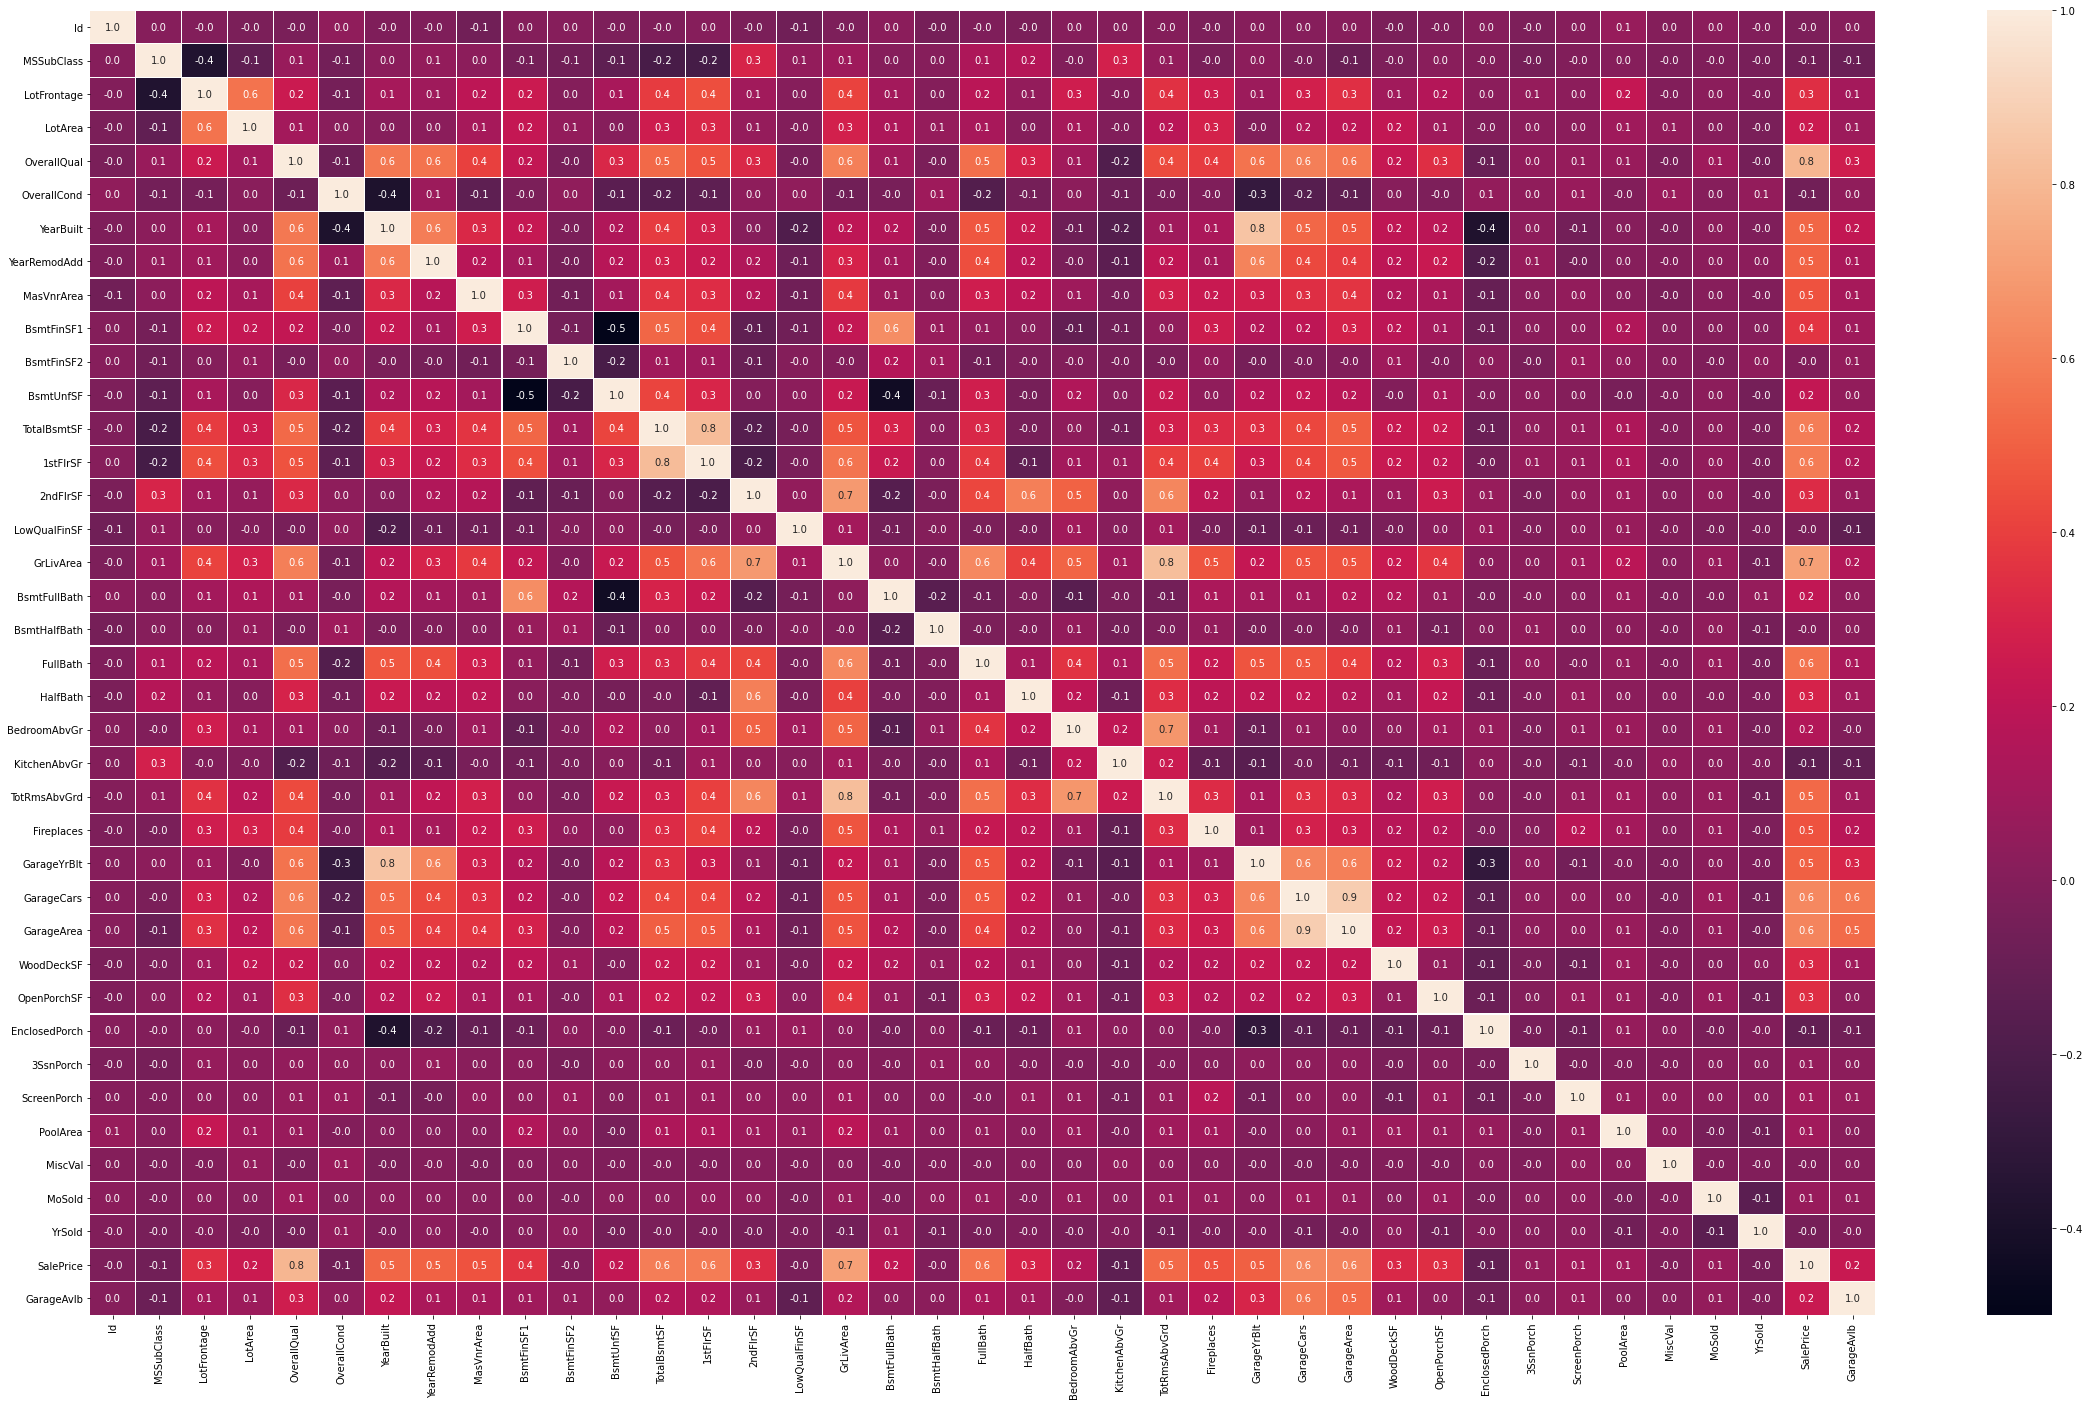

In [162]:
corr = train_df.select_dtypes(include='number').corr()
plt.figure(figsize=(40,24))
sns.heatmap(corr,linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

1.LotFrontage has only 34% correlation with the SalePrice(target variable). Hence I am going to drop it.

2.The YearBulit and the GarageYrBlt are highly correlated to each other. So I'll drop GarageYrBlt.

3.1stFlrSF and TotalBsmtSF are highly correlated to each other. I'll drop 1stFlrSF.

4.GrLivArea and TotRmsAbvGr are highly correlated to each other.. Ill drop TotRmsAbvGr.

5.GarageCars and GarageArea are highly correlated to each other. Ill drop GarageArea.

In [264]:
#dropping columns
train_df.drop(['LotFrontage','GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1, inplace=True)

# Data Visualization:

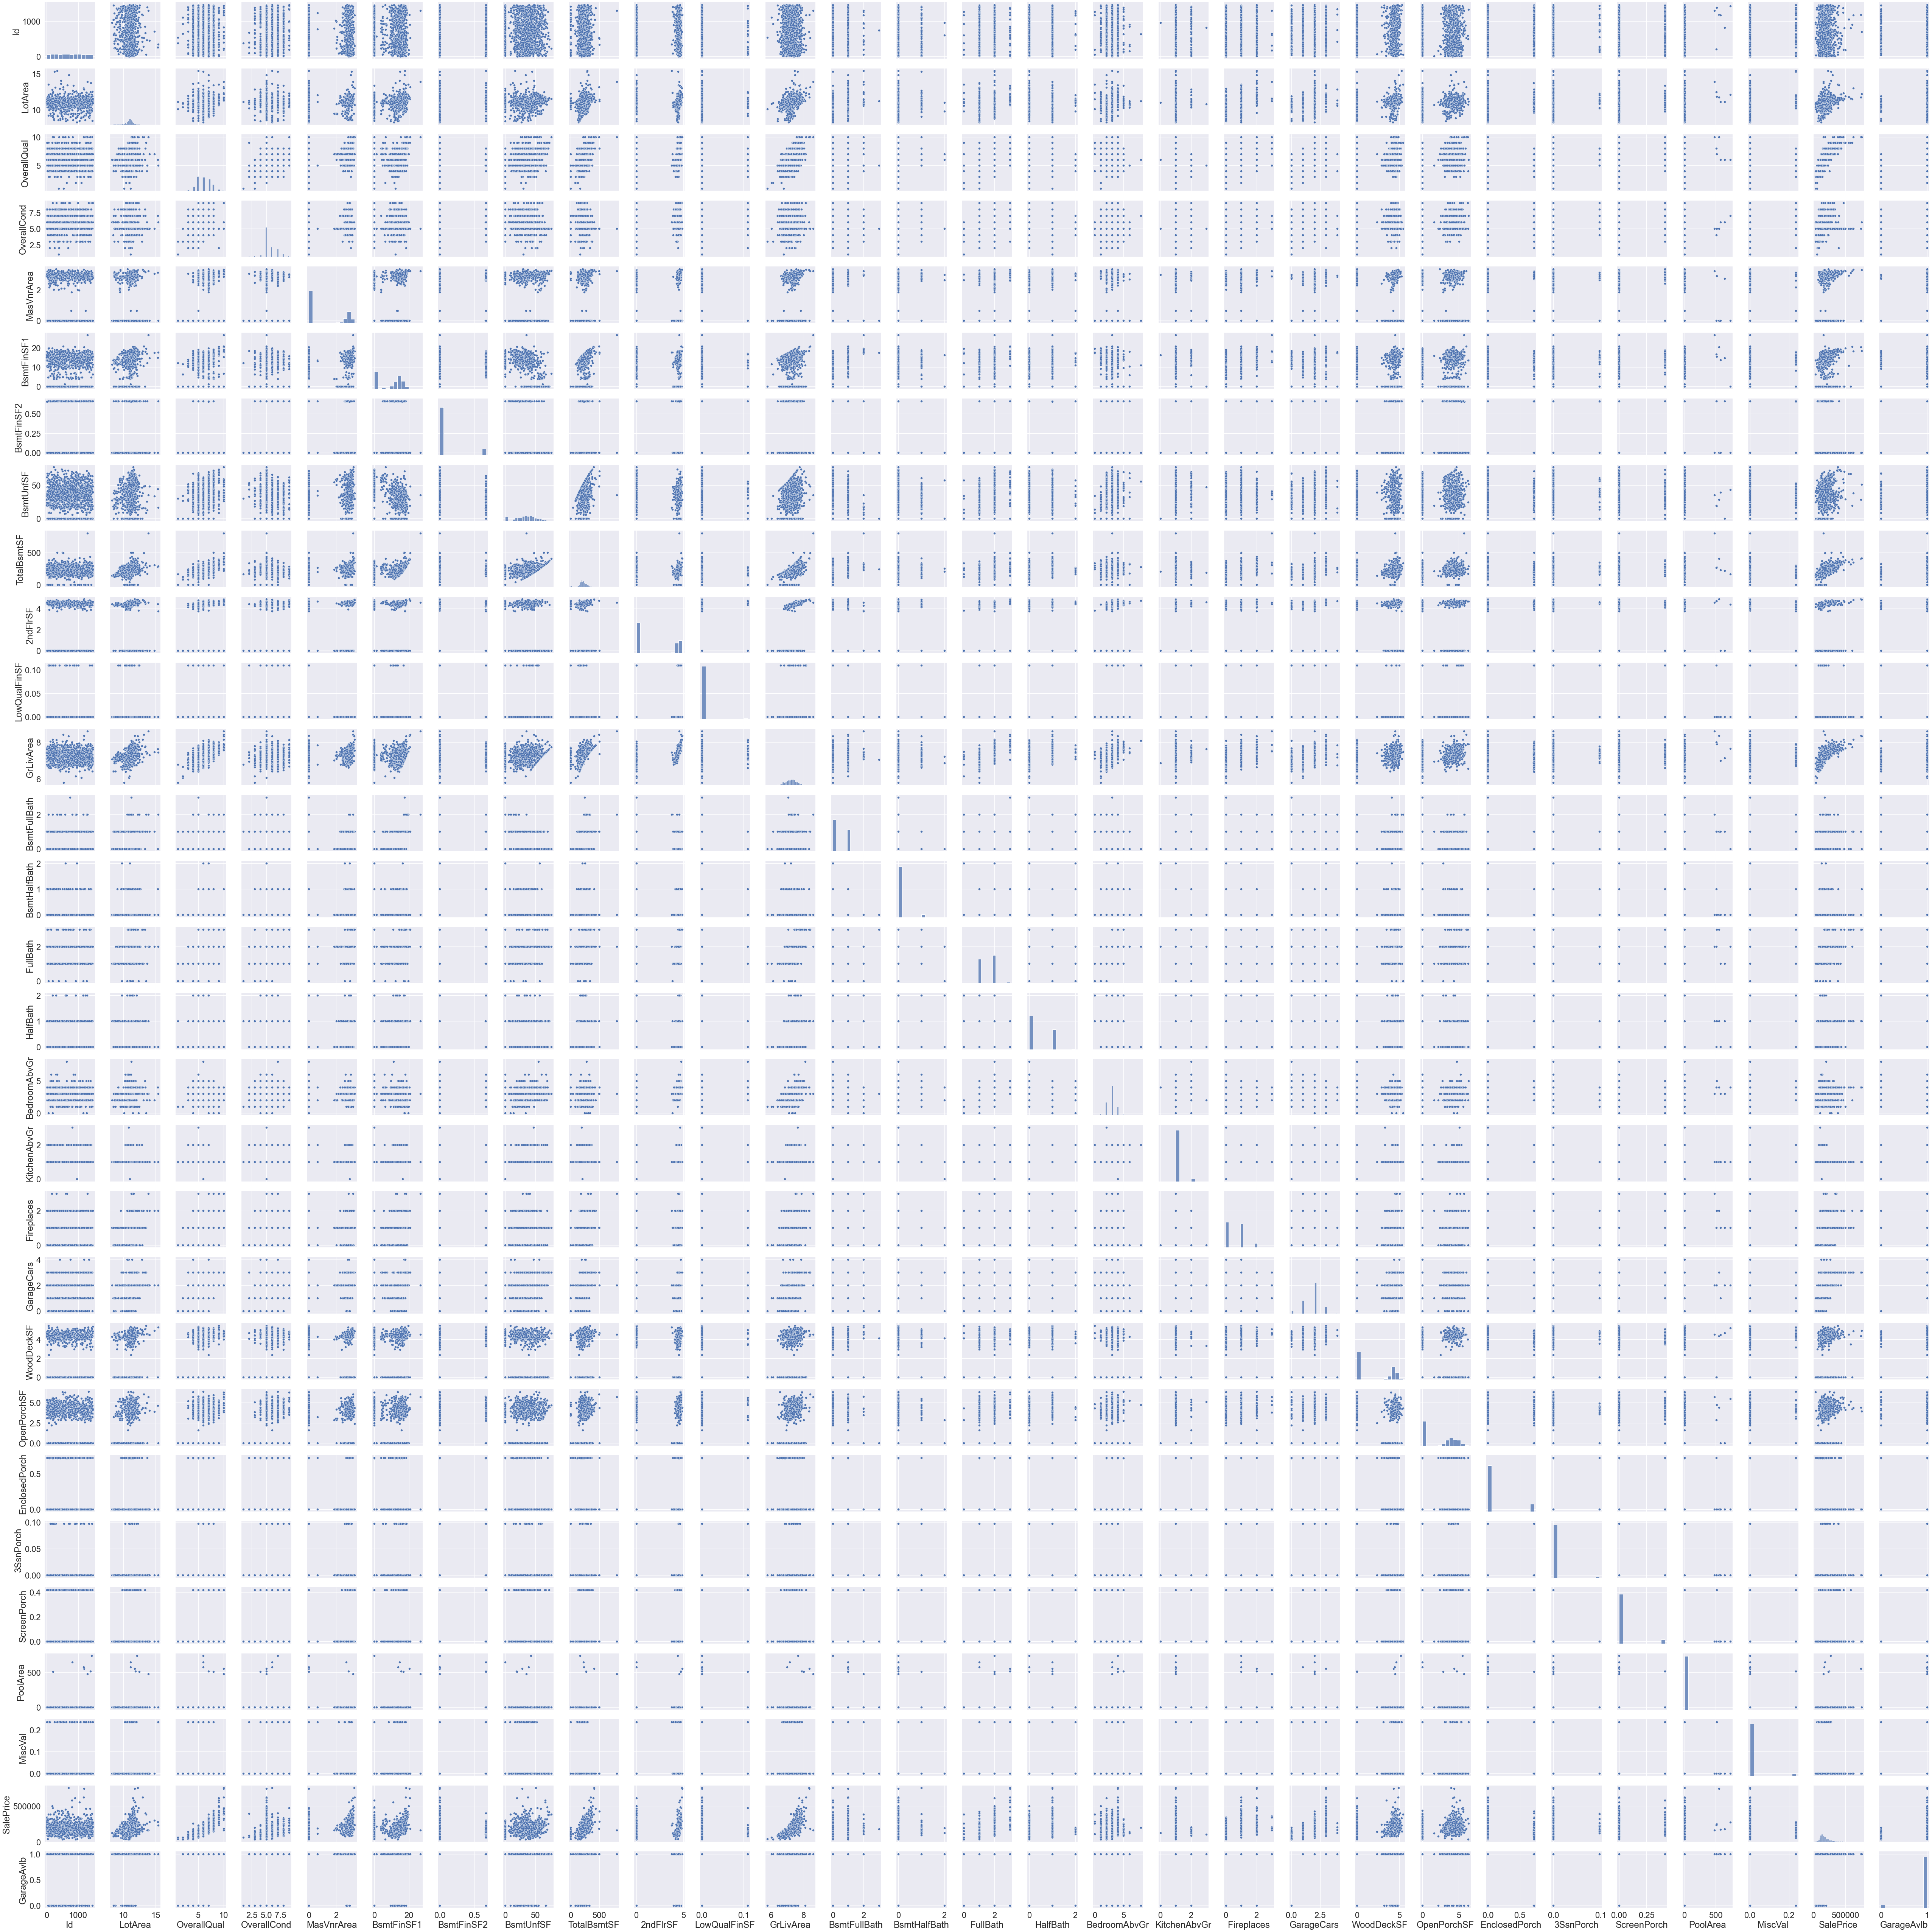

In [265]:
#plotting pairplt
sns.pairplot(train_df)

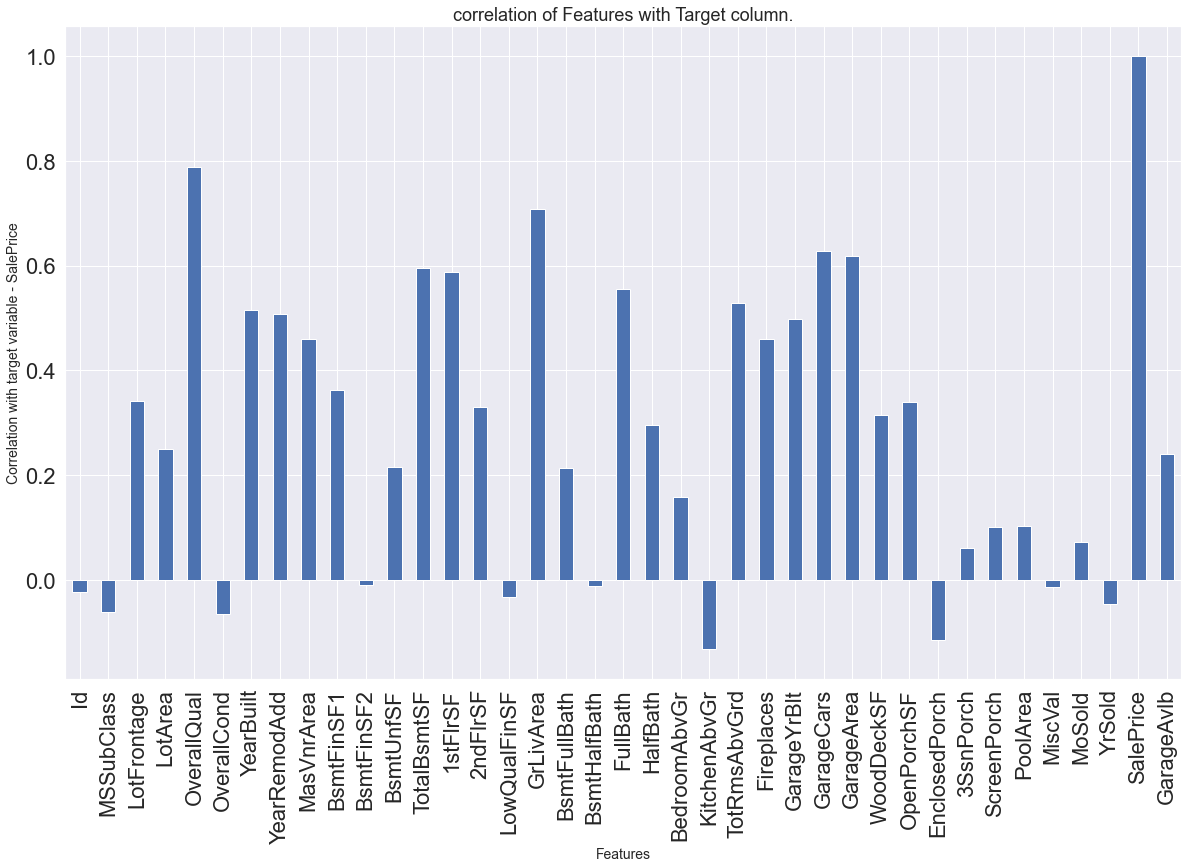

In [266]:
plt.figure(figsize=(20,12))
corr['SalePrice'].plot.bar()
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with target variable - SalePrice', fontsize=14)
plt.title("correlation of Features with Target column.", fontsize=18)
plt.show()

In [267]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1168 non-null   int64   
 1   MSSubClass     1168 non-null   category
 2   MSZoning       1168 non-null   category
 3   LotArea        1168 non-null   float64 
 4   Street         1168 non-null   category
 5   Alley          1168 non-null   category
 6   LotShape       1168 non-null   category
 7   LandContour    1168 non-null   category
 8   Utilities      1168 non-null   category
 9   LotConfig      1168 non-null   category
 10  LandSlope      1168 non-null   category
 11  Neighborhood   1168 non-null   category
 12  Condition1     1168 non-null   category
 13  Condition2     1168 non-null   category
 14  BldgType       1168 non-null   category
 15  HouseStyle     1168 non-null   category
 16  OverallQual    1168 non-null   int64   
 17  OverallCond    1168 non-null   in

In [268]:
train_df['MSSubClass'] = train_df['MSSubClass'].astype('str')
train_df['YearBuilt'] = train_df['YearBuilt'].astype('str')
train_df['YearRemodAdd'] = train_df['YearRemodAdd'].astype('str')

In [269]:
train_df['MoSold'].unique()

['2', '10', '6', '1', '11', ..., '7', '8', '3', '9', '12']
Length: 12
Categories (12, object): ['2', '10', '6', '1', ..., '8', '3', '9', '12']

In [270]:
train_df['MoSold'] = train_df['MoSold'].astype('str')
train_df['YrSold'] = train_df['YrSold'].astype('str')

In [271]:
train_df['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

In [272]:
train_df['HalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [273]:
train_df['BedroomAbvGr'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8], dtype=int64)

In [274]:
train_df['Electrical'].unique()

['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
Categories (5, object): ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']

In [275]:
#Converting 'object' datatype into 'category' datatype
for col in train_df.columns:
  if train_df[col].dtype == 'object':
    train_df[col] = train_df[col].astype('category')

In [276]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1168 non-null   int64   
 1   MSSubClass     1168 non-null   category
 2   MSZoning       1168 non-null   category
 3   LotArea        1168 non-null   float64 
 4   Street         1168 non-null   category
 5   Alley          1168 non-null   category
 6   LotShape       1168 non-null   category
 7   LandContour    1168 non-null   category
 8   Utilities      1168 non-null   category
 9   LotConfig      1168 non-null   category
 10  LandSlope      1168 non-null   category
 11  Neighborhood   1168 non-null   category
 12  Condition1     1168 non-null   category
 13  Condition2     1168 non-null   category
 14  BldgType       1168 non-null   category
 15  HouseStyle     1168 non-null   category
 16  OverallQual    1168 non-null   int64   
 17  OverallCond    1168 non-null   in

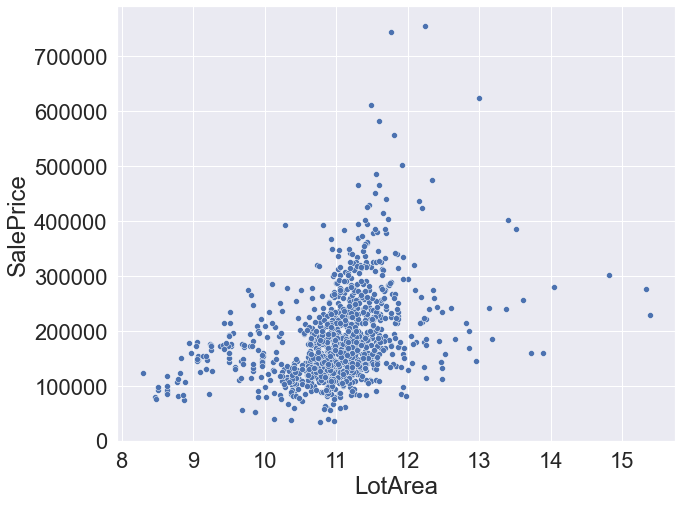

In [277]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['LotArea'], train_df['SalePrice'])
sns.set_style('darkgrid')
plt.show()

#### from the above ,it is oberved that 'LotArea' is positively correlated with 'SalePrice'

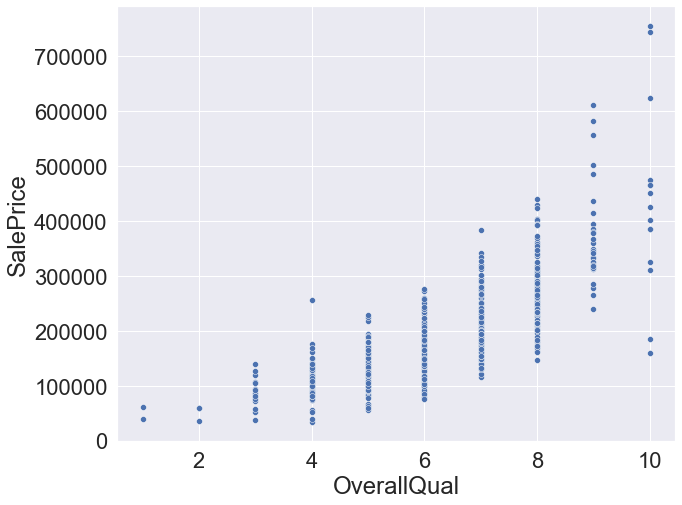

In [278]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['OverallQual'], train_df['SalePrice'])
sns.set_style('darkgrid')
plt.show()

#### from the above ,it is oberved that 'OverallQual' is positively correlated with 'SalePrice'

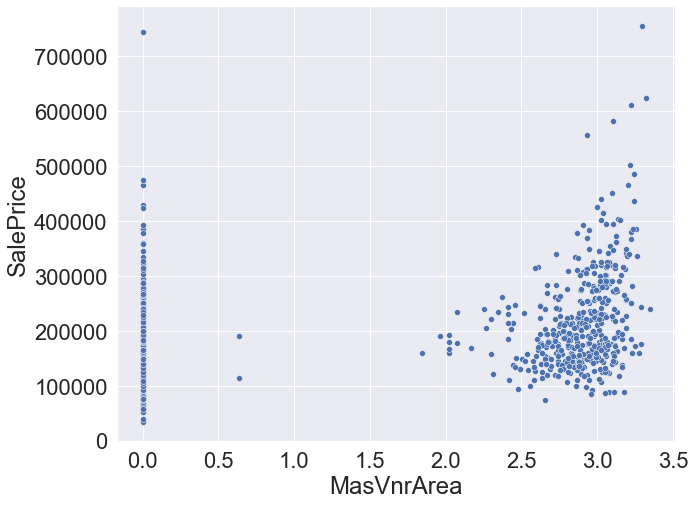

In [279]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['MasVnrArea'], train_df['SalePrice'])
plt.show()

#### from the above ,it is oberved that 'MasVnrArea' is NOT positively correlated with 'SalePrice'

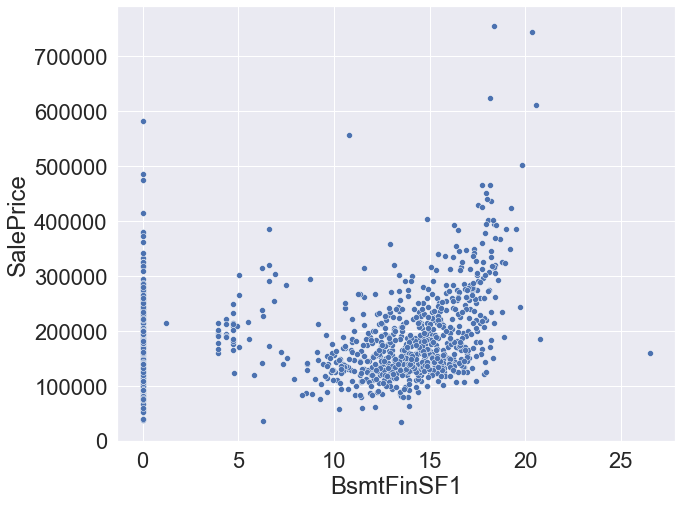

In [281]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['BsmtFinSF1'], train_df['SalePrice'])
plt.show()

#### from the above ,it is oberved that 'BsmtFinSF1' is positively correlated with 'SalePrice'

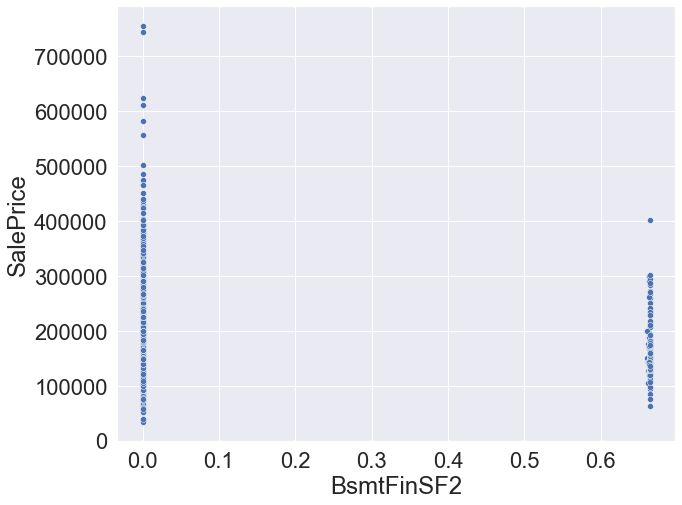

In [282]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['BsmtFinSF2'], train_df['SalePrice'])
plt.show()

#### from the above ,it is oberved that 'BsmtFinSF1' is positively correlated with 'SalePrice'

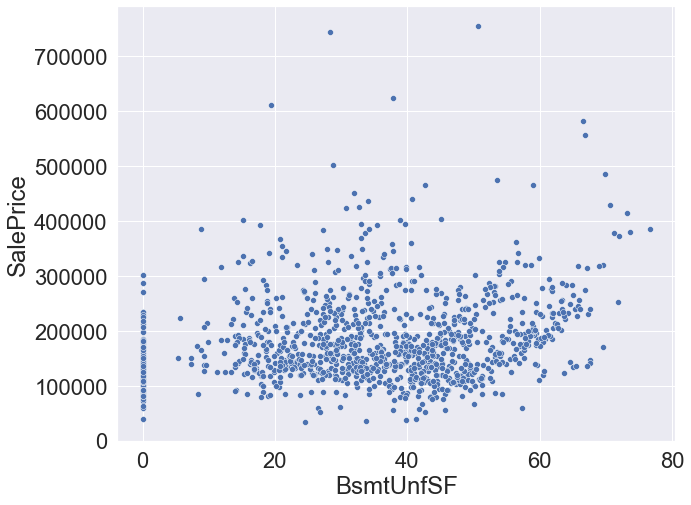

In [283]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['BsmtUnfSF'], train_df['SalePrice'])
plt.show()

#### from the above ,it is obesrved that 'BsmtUnfSF' is Slightly positively correlated with 'SalePrice'

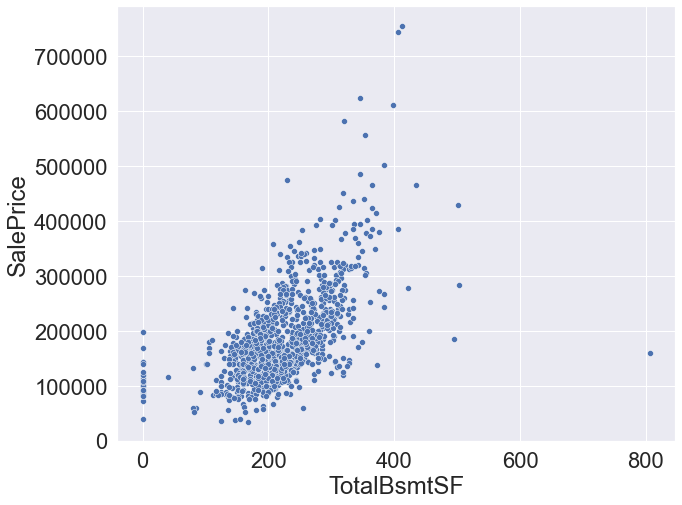

In [284]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['TotalBsmtSF'], train_df['SalePrice'])
plt.show()

#### TotalBsmtSF and SalePrice have a positive correlation and relationship shows linearity.

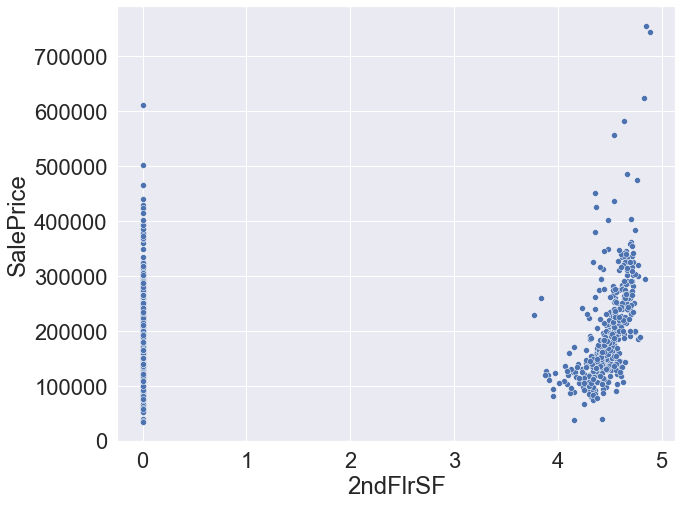

In [285]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['2ndFlrSF'], train_df['SalePrice'])
plt.show()

#### from the above ,it is obesrved that '2ndFlrSF' is positively correlated with 'SalePrice'

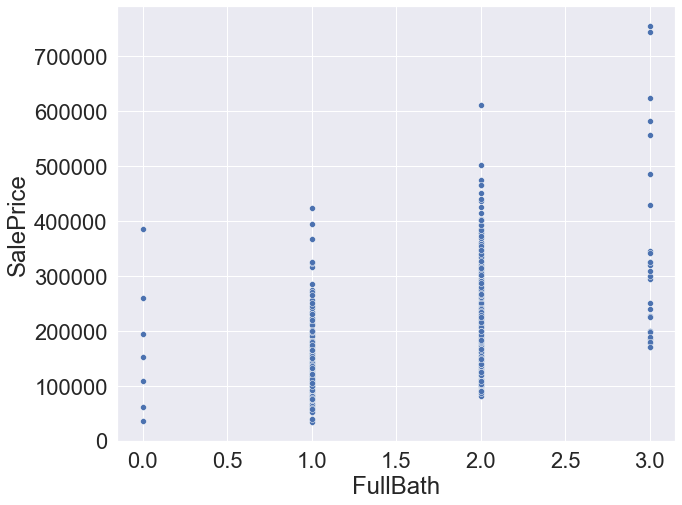

In [286]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['FullBath'], train_df['SalePrice'])
plt.show()

#### There is positve correlation between FullBath and SalePrice.

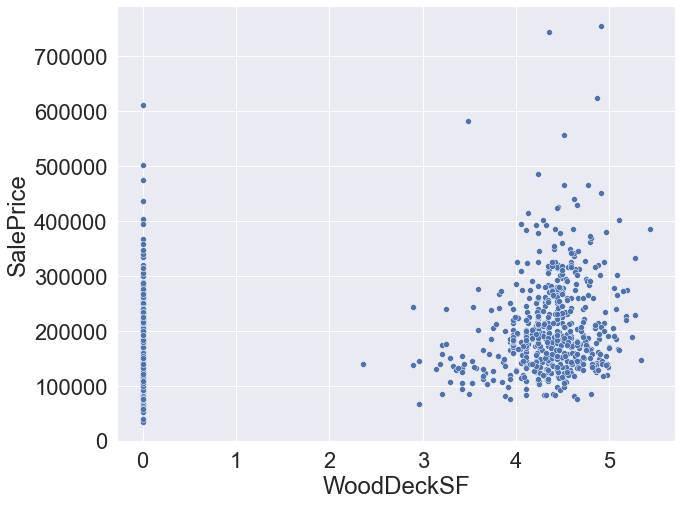

In [287]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['WoodDeckSF'], train_df['SalePrice'])
plt.show()

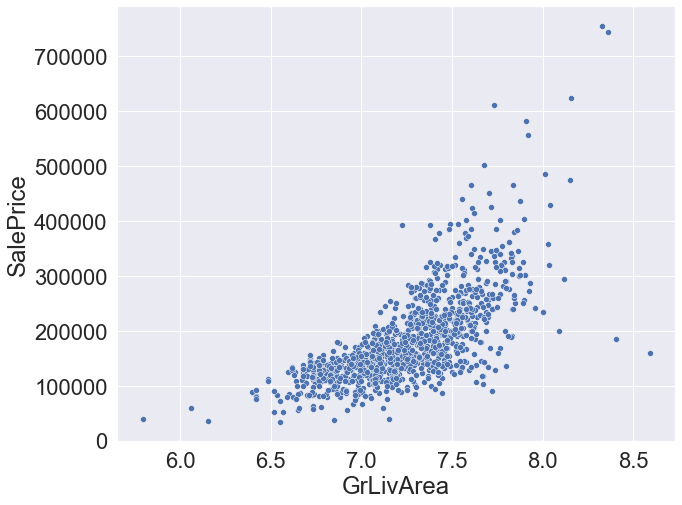

In [288]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_df['GrLivArea'], train_df['SalePrice'])
plt.show()

#### from the above ,it is oberved that 'GrLivArea' is GOOD positively correlated with 'SalePrice'

# skewness:

In [289]:
train_df.skew()

Id                0.026526
LotArea           0.032509
OverallQual       0.175082
OverallCond       0.580714
MasVnrArea        0.439526
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
Fireplaces        0.671966
GarageCars       -0.358556
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         13.243711
MiscVal           4.991071
SalePrice         1.953878
GarageAvlb       -3.917573
dtype: float64

In [290]:
train__df_cat_features = train_df.select_dtypes(include = 'category')
train_df_num_features = train_df.select_dtypes(exclude = 'category')

<Figure size 432x288 with 0 Axes>

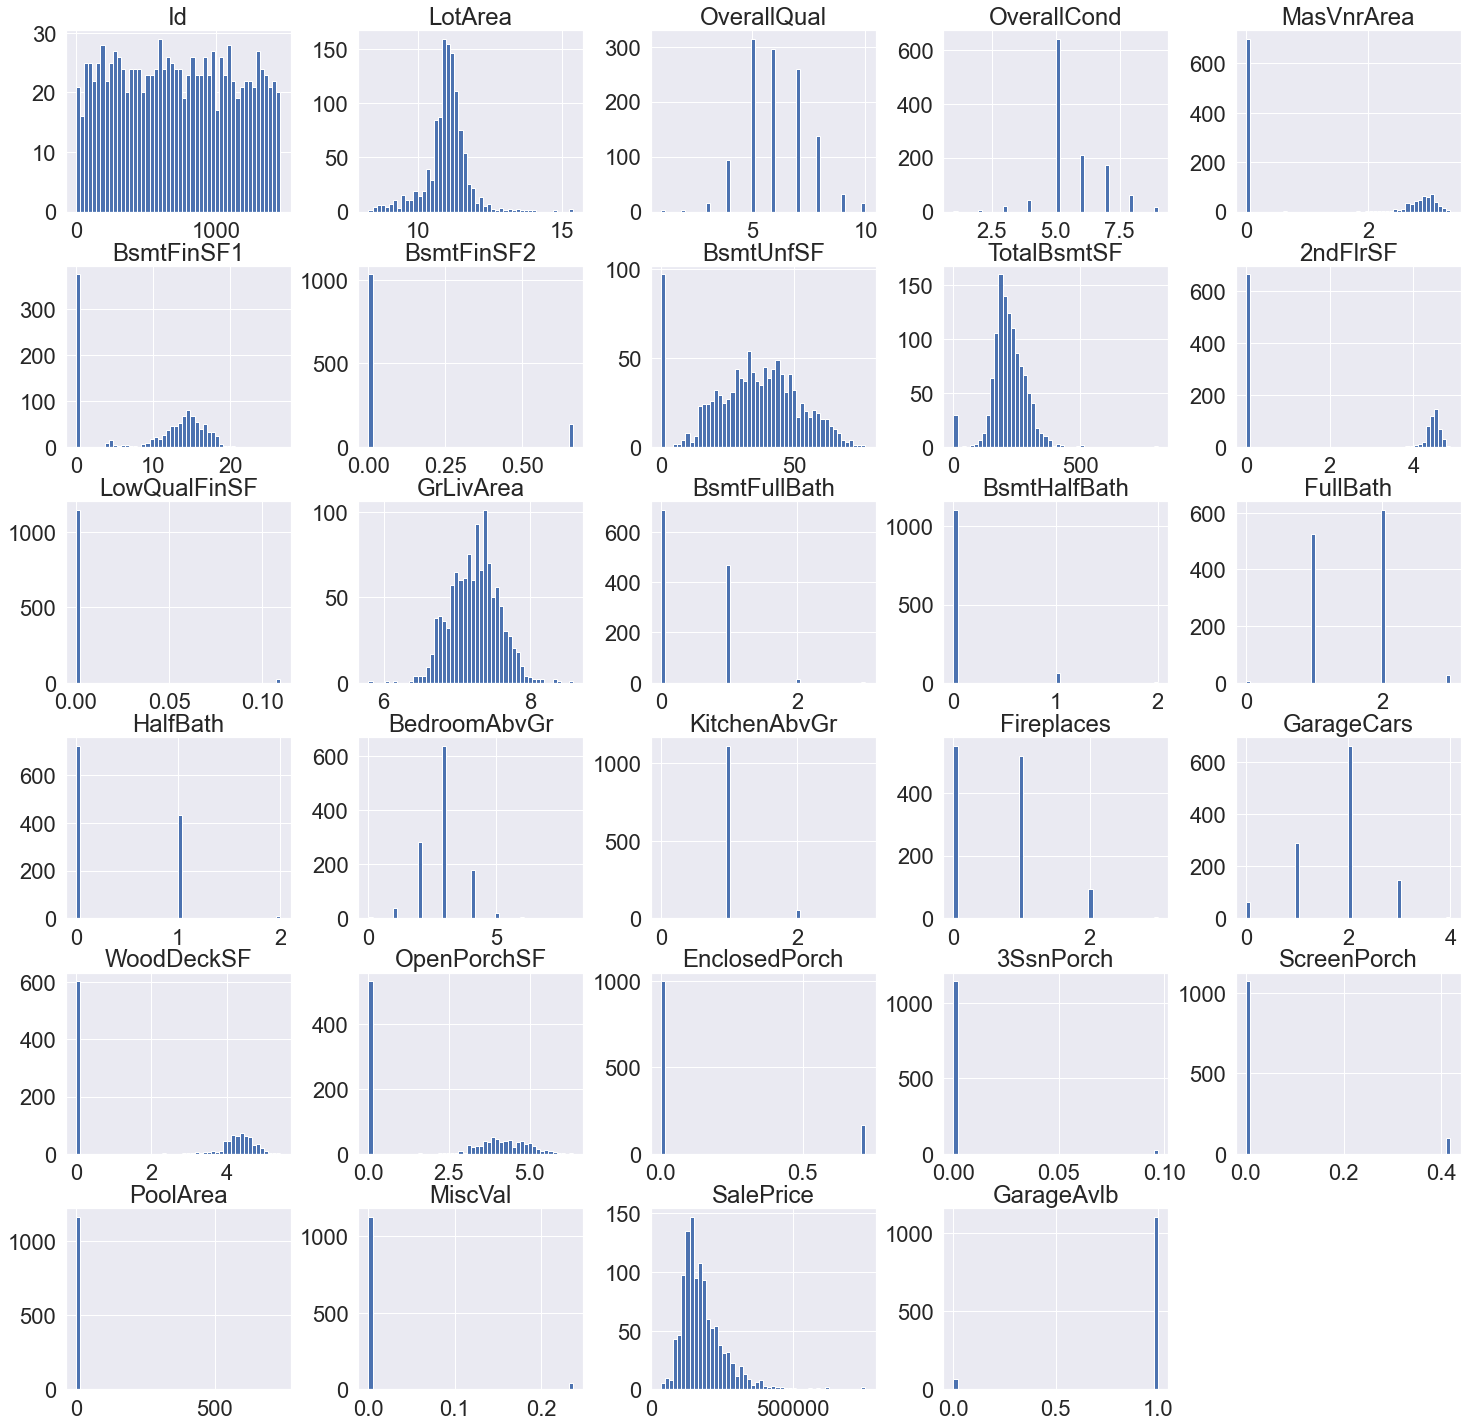

In [291]:
plt.figure()
train_df_num_features.hist(figsize=(25,25),bins=50)
plt.show()

# PowerTransform:

In [292]:
from sklearn.preprocessing import PowerTransformer

In [293]:
trans_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

In [294]:
PT = PowerTransformer(standardize=False)

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>],
       [<AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'MiscVal'}>, <AxesSubplot:>]],
      dtype=object)

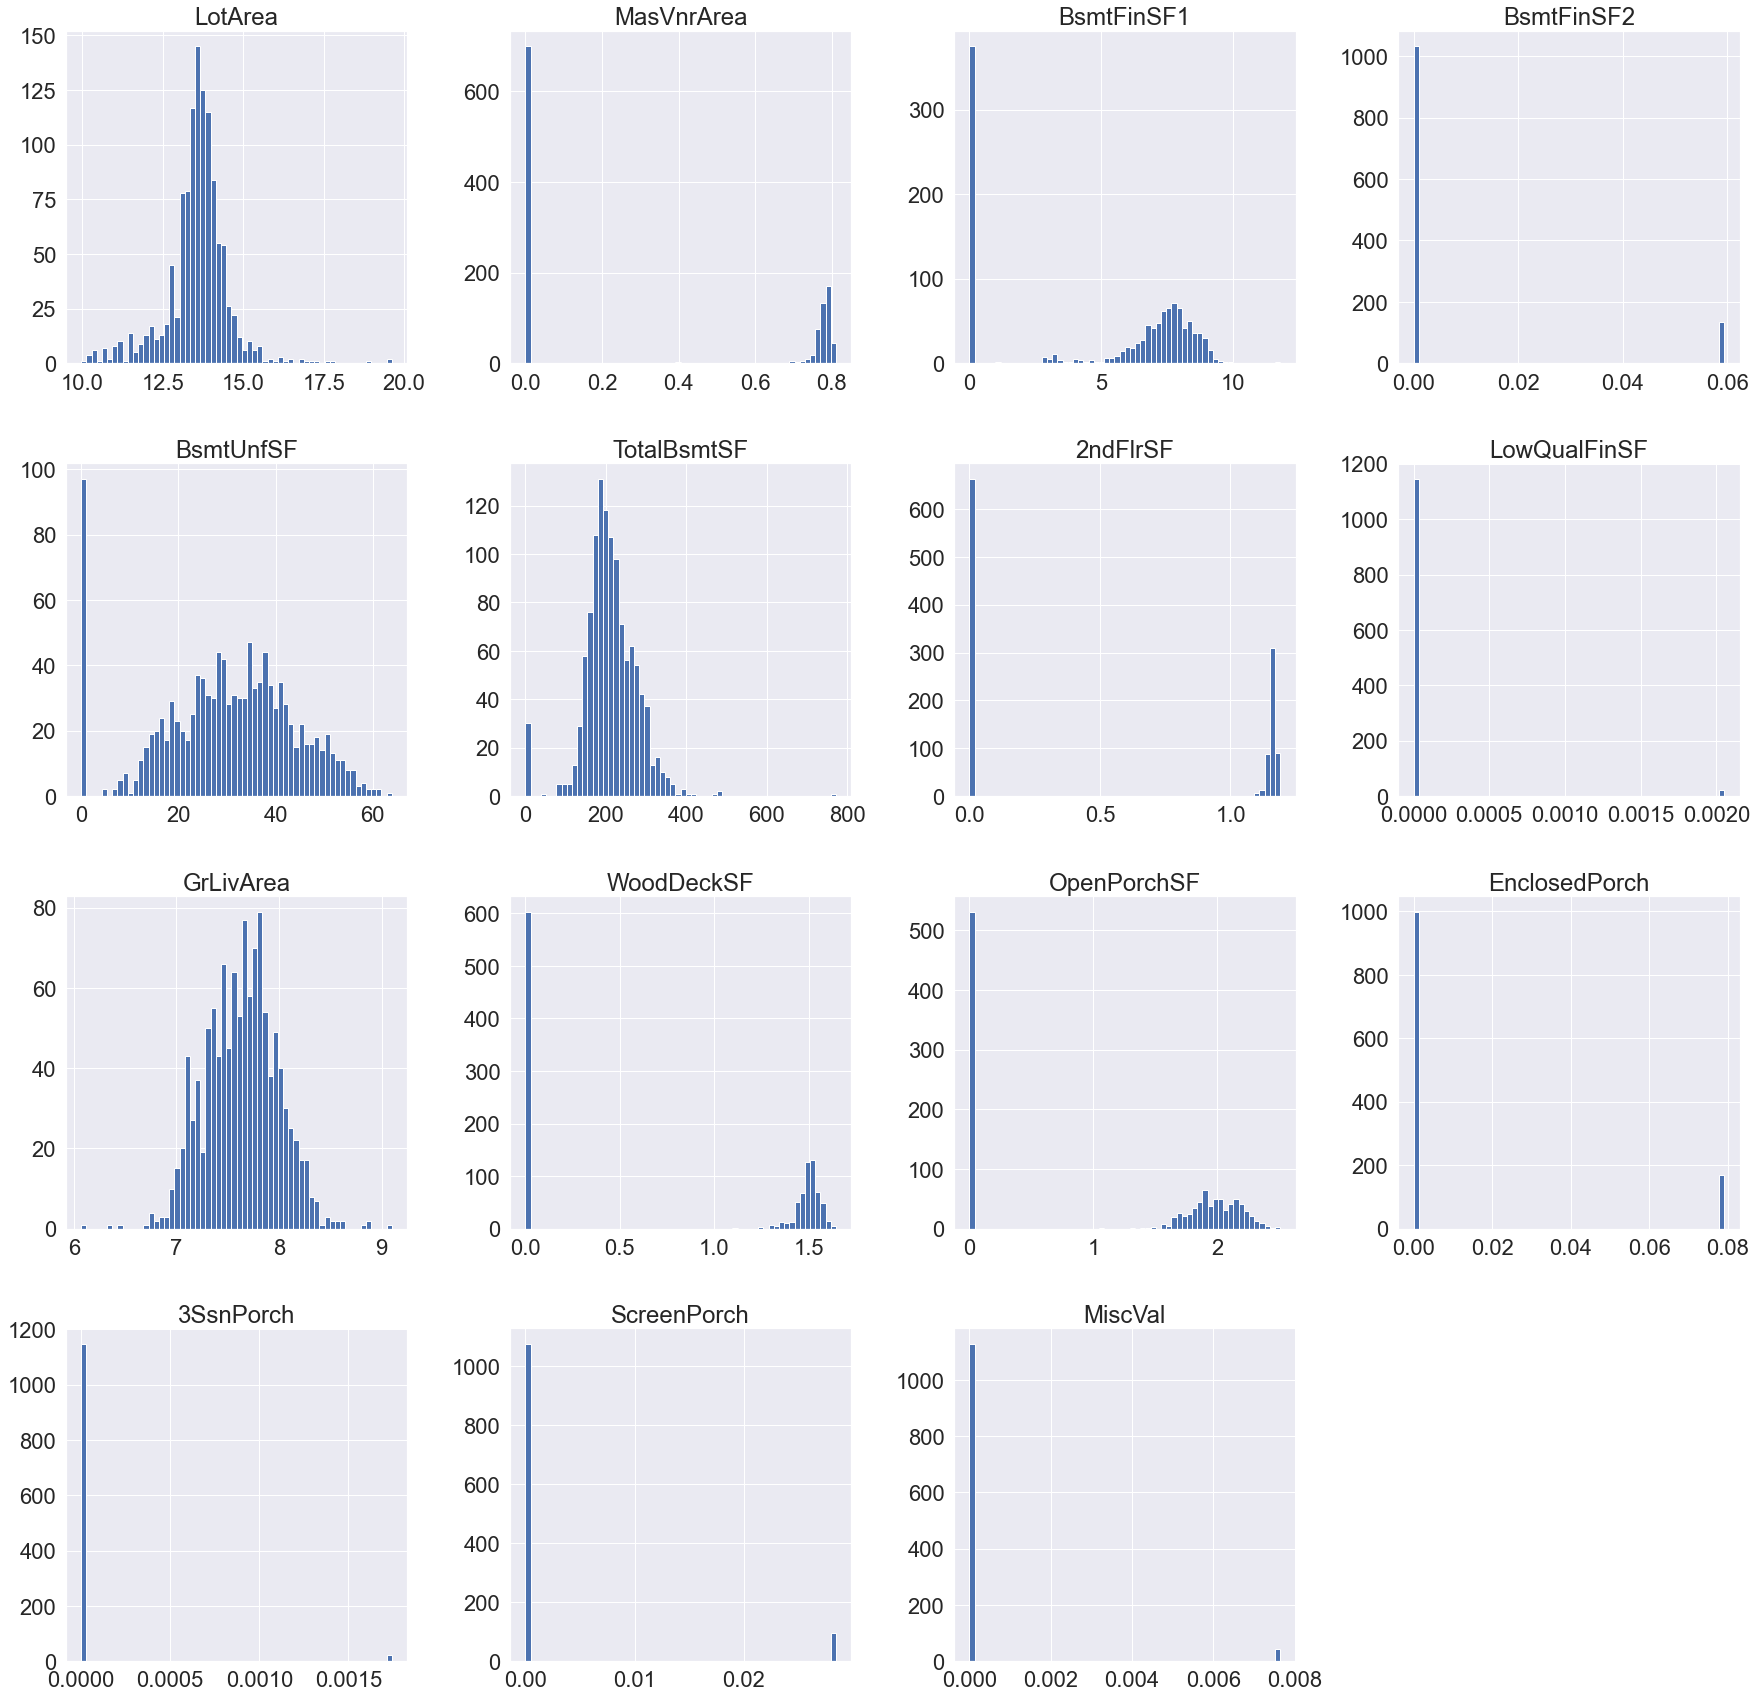

In [295]:
train_df[trans_col] = PT.fit_transform(train_df[trans_col])
train_df[trans_col].hist(figsize=(30,30), bins=60)

# Checking For Outliers:

In [296]:
col = train_df_num_features.columns

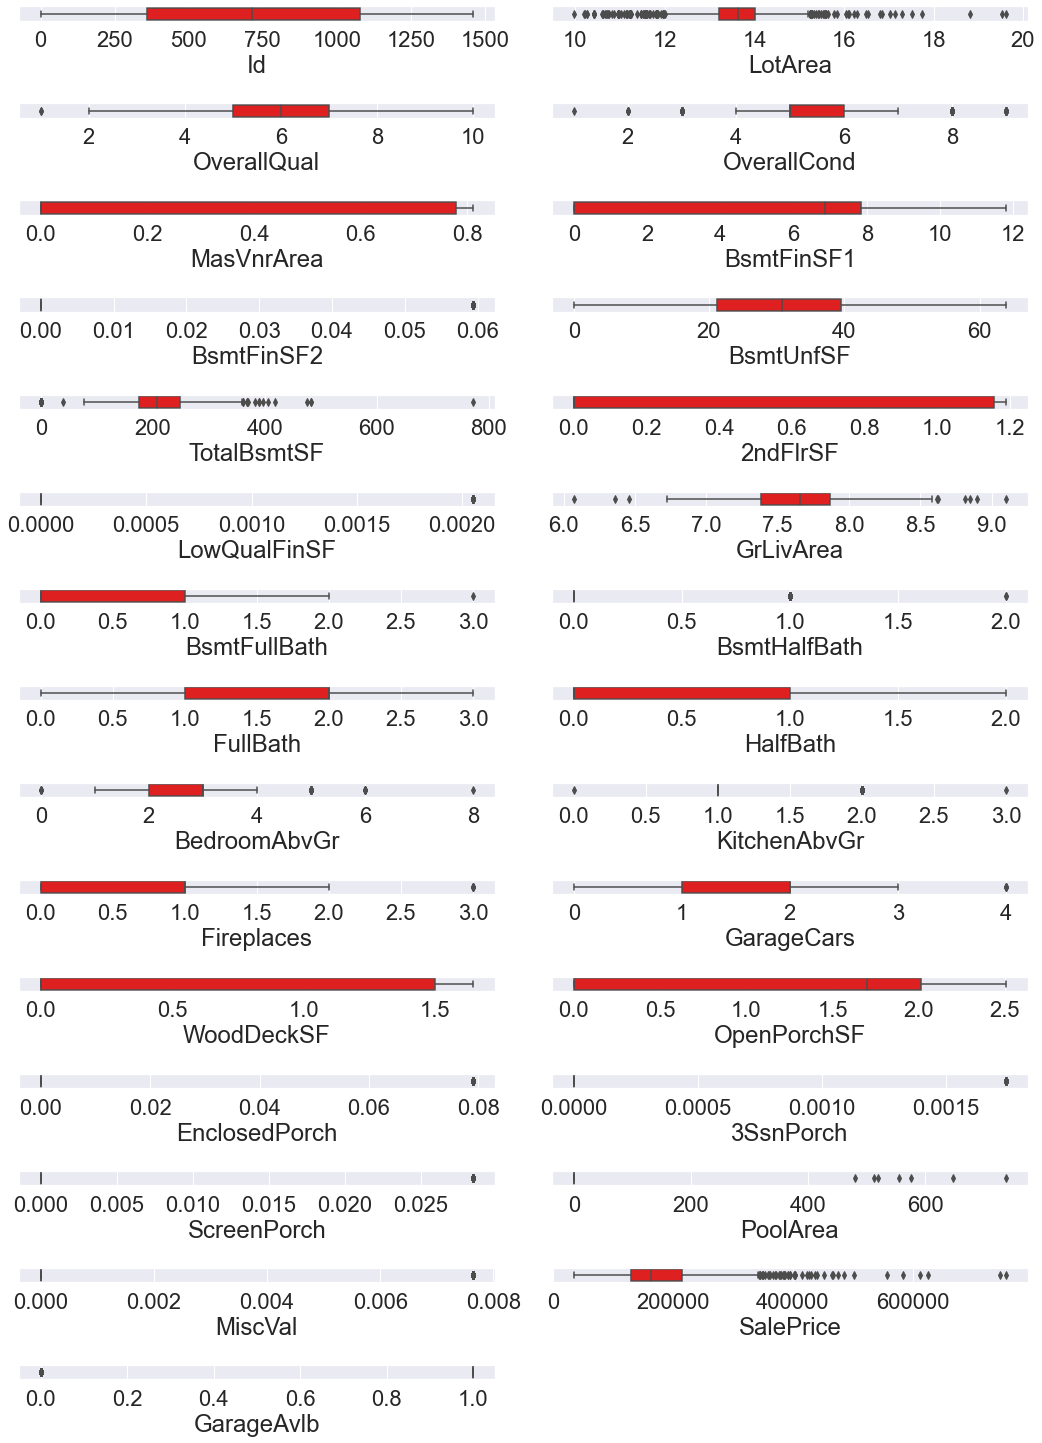

In [297]:
plt.figure(figsize=(15, 40))
for i in range(0,len(col)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 2)
  sns.boxplot(train_df[col[i]], color='red')
  plt.tight_layout()

# Scaling :

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
mms = MinMaxScaler()

In [300]:
train_cat_features = train_df.select_dtypes(include = 'category')
train_num_trans_features = train_df.select_dtypes(exclude = 'category')

In [301]:
scaled_train = pd.DataFrame(mms.fit_transform(train_num_trans_features.drop(['Id','SalePrice'], axis=1)), columns=train_num_trans_features.drop(['Id','SalePrice'], axis=1).columns)

In [302]:
scaled_train

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     0.249584     0.555556        0.500    0.000000    0.439086         0.0   
1     0.484222     0.777778        0.625    0.000000    0.568247         1.0   
2     0.388195     0.666667        0.500    0.000000    0.690931         0.0   
3     0.422555     0.555556        0.625    0.982895    0.662216         0.0   
4     0.494049     0.555556        0.750    0.953188    0.745565         0.0   
...        ...          ...          ...         ...         ...         ...   
1163  0.386130     0.444444        0.500    0.899724    0.600755         0.0   
1164  0.363558     0.333333        0.500    0.000000    0.000000         0.0   
1165  0.102945     0.555556        0.625    0.000000    0.631704         0.0   
1166  0.357131     0.333333        0.375    0.000000    0.000000         0.0   
1167  0.341516     0.555556        0.500    0.000000    0.602809         0.0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  ...  Fireplaces  \
0      0.665994     0.282487  0.000000           0.0  ...    0.333333   
1      0.692513     0.478002  0.000000           0.0  ...    0.333333   
2      0.358707     0.289914  0.978602           0.0  ...    0.333333   
3      0.721044     0.417938  0.000000           0.0  ...    0.333333   
4      0.420210     0.377187  0.000000           0.0  ...    0.333333   
...         ...          ...       ...           ...  ...         ...   
1163   0.460236     0.243966  0.000000           0.0  ...    0.000000   
1164   0.000000     0.000000  0.000000           0.0  ...    0.000000   
1165   0.380726     0.238485  0.967265           0.0  ...    0.333333   
1166   0.556405     0.194938  0.970459           0.0  ...    0.000000   
1167   0.403097     0.223630  0.971931           0.0  ...    0.333333   

      GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0.50    0.000000     0.911710       0.000000        0.0   
1           0.50    0.860550     0.912632       0.000000        0.0   
2           0.50    0.915438     0.867252       0.000000        0.0   
3           0.50    0.000000     0.860856       0.000000        0.0   
4           0.50    0.933034     0.000000       0.000000        0.0   
...          ...         ...          ...            ...        ...   
1163        0.25    0.000000     0.000000       0.000000        0.0   
1164        0.50    0.000000     0.836258       0.000000        0.0   
1165        0.50    0.865866     0.000000       0.000000        0.0   
1166        0.25    0.000000     0.774032       0.999996        0.0   
1167        0.50    0.875982     0.810130       0.000000        0.0   

      ScreenPorch  PoolArea  MiscVal  GarageAvlb  
0             0.0       0.0      0.0         1.0  
1             1.0       0.0      0.0         1.0  
2             0.0       0.0      0.0         1.0  
3             0.0       0.0      0.0         1.0  
4             0.0       0.0      0.0         1.0  
...           ...       ...      ...         ...  
1163          0.0       0.0      0.0         1.0  
1164          0.0       0.0      0.0         1.0  
1165          0.0       0.0      0.0         1.0  
1166          0.0       0.0      0.0         1.0  
1167          0.0       0.0      0.0         1.0  

[1168 rows x 27 columns]

# Encoding :

In [303]:
from sklearn.preprocessing import OneHotEncoder

In [304]:
en = OneHotEncoder(handle_unknown='ignore')

In [305]:
train_cat_features.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0        120       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
1         20       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
2         60       RL   Pave    NA      IR1         Lvl    AllPub   CulDSac   
3         20       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
4         20       RL   Pave    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive PoolQC  Fence  \
0       Gtl      NPkVill  ...         TA         TA          Y     NA     NA   
1       Mod        NAmes  ...         TA         TA          Y     NA     NA   
2       Gtl      NoRidge  ...         TA         TA          Y     NA     NA   
3       Gtl       NWAmes  ...         TA         TA          Y     NA  MnPrv   
4       Gtl       NWAmes  ...         TA         TA          Y     NA     NA   

  MiscFeature MoSold YrSold SaleType SaleCondition  
0          NA      2   2007       WD        Normal  
1          NA     10   2007       WD        Normal  
2          NA      6   2007       WD        Normal  
3          NA      1   2010      COD        Normal  
4          NA      6   2009       WD        Normal  

[5 rows x 48 columns]

In [306]:
train_enc_cat_df = pd.DataFrame(en.fit_transform(train_cat_features).toarray())
train_enc_cat_df

0    1    2    3    4    5    6    7    8    9    ...  457  458  459  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1163  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1164  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1165  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1166  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1167  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

      460  461  462  463  464  465  466  
0     1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1     1.0  0.0  0.0  0.0  0.0  1.0  0.0  
2     1.0  0.0  0.0  0.0  0.0  1.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4     1.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
1163  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1164  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1165  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1166  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1167  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1168 rows x 467 columns]

In [307]:
#Joining transformed and scaled numerical features and encoded categorical features
train_en_df = scaled_train.join(train_enc_cat_df)

In [308]:
train_en_df

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     0.249584     0.555556        0.500    0.000000    0.439086         0.0   
1     0.484222     0.777778        0.625    0.000000    0.568247         1.0   
2     0.388195     0.666667        0.500    0.000000    0.690931         0.0   
3     0.422555     0.555556        0.625    0.982895    0.662216         0.0   
4     0.494049     0.555556        0.750    0.953188    0.745565         0.0   
...        ...          ...          ...         ...         ...         ...   
1163  0.386130     0.444444        0.500    0.899724    0.600755         0.0   
1164  0.363558     0.333333        0.500    0.000000    0.000000         0.0   
1165  0.102945     0.555556        0.625    0.000000    0.631704         0.0   
1166  0.357131     0.333333        0.375    0.000000    0.000000         0.0   
1167  0.341516     0.555556        0.500    0.000000    0.602809         0.0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  ...  457  458  459  460  \
0      0.665994     0.282487  0.000000           0.0  ...  0.0  0.0  0.0  1.0   
1      0.692513     0.478002  0.000000           0.0  ...  0.0  0.0  0.0  1.0   
2      0.358707     0.289914  0.978602           0.0  ...  0.0  0.0  0.0  1.0   
3      0.721044     0.417938  0.000000           0.0  ...  0.0  0.0  0.0  0.0   
4      0.420210     0.377187  0.000000           0.0  ...  0.0  0.0  0.0  1.0   
...         ...          ...       ...           ...  ...  ...  ...  ...  ...   
1163   0.460236     0.243966  0.000000           0.0  ...  0.0  0.0  0.0  1.0   
1164   0.000000     0.000000  0.000000           0.0  ...  0.0  0.0  0.0  1.0   
1165   0.380726     0.238485  0.967265           0.0  ...  0.0  0.0  0.0  1.0   
1166   0.556405     0.194938  0.970459           0.0  ...  0.0  0.0  0.0  1.0   
1167   0.403097     0.223630  0.971931           0.0  ...  0.0  0.0  0.0  1.0   

      461  462  463  464  465  466  
0     0.0  0.0  0.0  0.0  1.0  0.0  
1     0.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  1.0  0.0  
3     0.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  
1163  0.0  0.0  0.0  0.0  1.0  0.0  
1164  0.0  0.0  0.0  0.0  1.0  0.0  
1165  0.0  0.0  0.0  0.0  1.0  0.0  
1166  0.0  0.0  0.0  0.0  1.0  0.0  
1167  0.0  0.0  0.0  0.0  1.0  0.0  

[1168 rows x 494 columns]

In [309]:
#Verifying the inverse of encoded value
en.inverse_transform(train_enc_cat_df)

array([['120', 'RL', 'Pave', ..., '2007', 'WD', 'Normal'],
       ['20', 'RL', 'Pave', ..., '2007', 'WD', 'Normal'],
       ['60', 'RL', 'Pave', ..., '2007', 'WD', 'Normal'],
       ...,
       ['160', 'RL', 'Pave', ..., '2009', 'WD', 'Normal'],
       ['70', 'C (all)', 'Pave', ..., '2008', 'WD', 'Normal'],
       ['60', 'RL', 'Pave', ..., '2006', 'WD', 'Normal']], dtype=object)

# Model Building:

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [312]:
#Splitting data
X = train_en_df
y = train_df[['SalePrice']]

Transforming and scaling the target variable since its continuous, skewed and in a different scale than the other numerical data.

In [313]:
target_mn = MinMaxScaler()
target_pt = PowerTransformer(standardize=False)
y_enc = target_mn.fit_transform(target_pt.fit_transform(y))
y_enc

array([[0.43944331],
       [0.67823519],
       [0.68035091],
       ...,
       [0.48808022],
       [0.04732221],
       [0.55628676]])

In [314]:
target_pt.inverse_transform(target_mn.inverse_transform(y_enc))

array([[128000.],
       [268000.],
       [269790.],
       ...,
       [148500.],
       [ 40000.],
       [183200.]])

In [315]:
y

SalePrice
0        128000
1        268000
2        269790
3        190000
4        215000
...         ...
1163     122000
1164     108000
1165     148500
1166      40000
1167     183200

[1168 rows x 1 columns]

# 'X' contains the Features and 'y_enc' contains the Target.

In [319]:

maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y_enc,test_size=.30,random_state=i)
    model = Ridge()
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9025482153412435  on Random_state  548


In [320]:
X_train,X_test,y_train,y_test = train_test_split(X,y_enc,test_size=.30,random_state=548)

## Comparing base models

Model: Lasso
R2 score: -0.006262995951936223
Variance: 6.582495253428846e-05
Model: Ridge
R2 score: 0.8051495968223182
Variance: 0.004102658115073104
Model: SVR
R2 score: 0.7264465848234065
Variance: 0.0017597720117194405
Model: DecisionTreeRegressor
R2 score: 0.636403652348921
Variance: 0.010088964704960174
Model: KNeighborsRegressor
R2 score: 0.6984171502478672
Variance: 0.000846386235035393


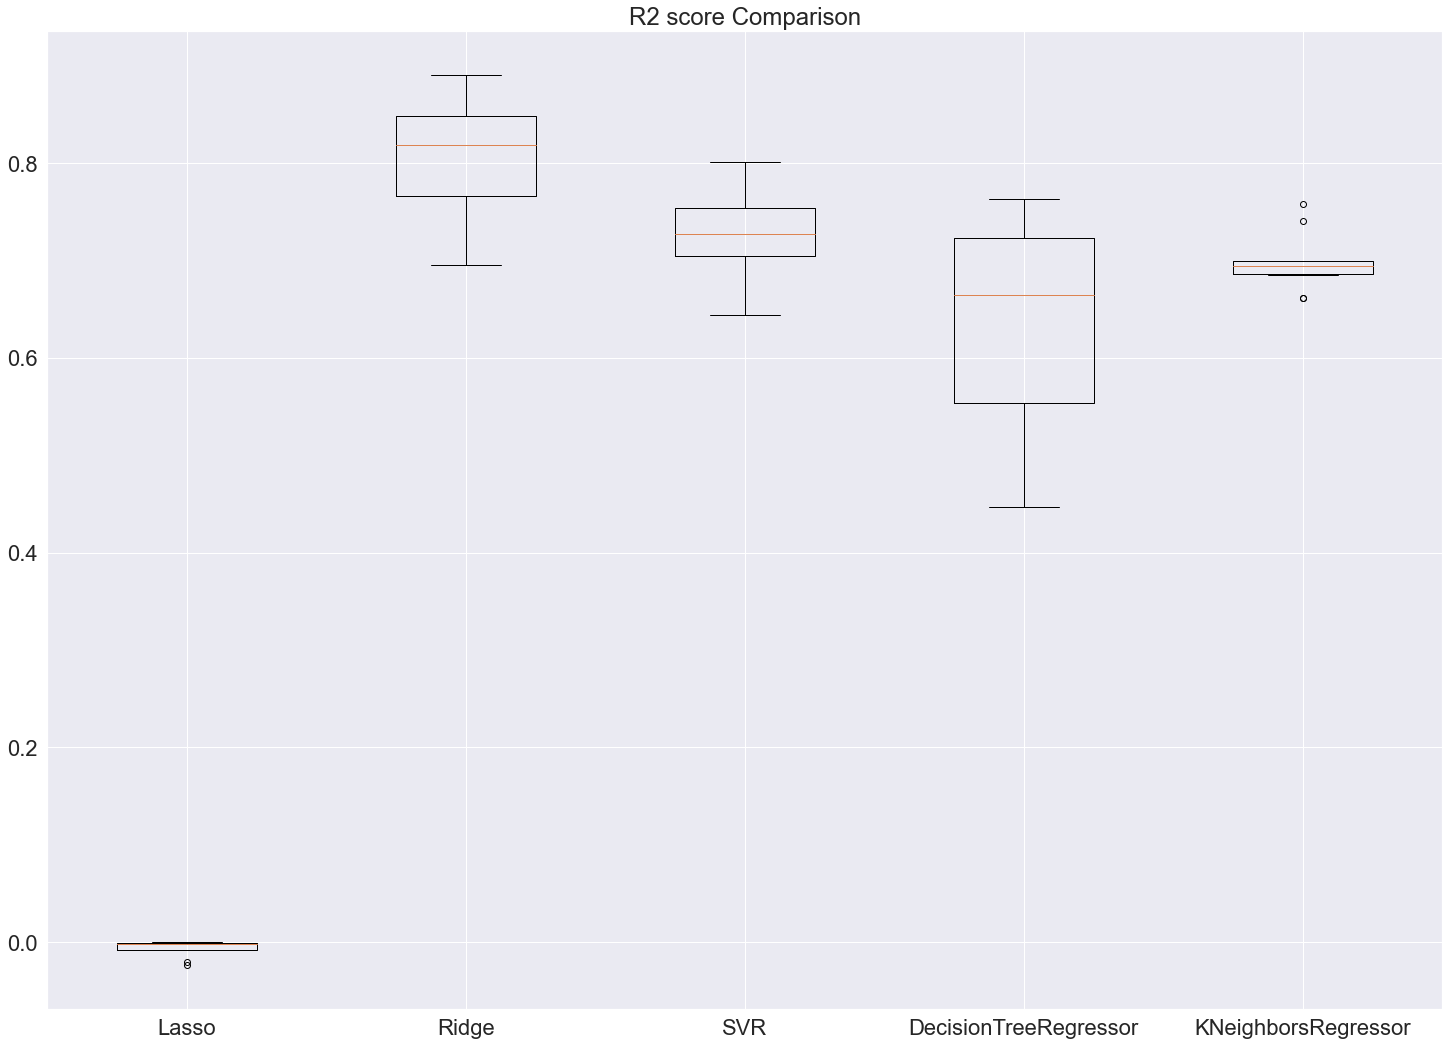

In [379]:
models = [Lasso(), Ridge(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]
results = []
m_names = []

for model in models:

  cv_model = cross_val_score(model, X_train, y_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"R2 score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)
  results.append(cv_model)
  m_names.append(model.__class__.__name__)

# Compare Algorithms
plt.figure(figsize = (25,18))
plt.title('R2 score Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

### Comparing the Mean Squared Errors

Model: Lasso
Mean Cross val error: -0.015510090542570637
Variance: 1.1837875480127504e-05
Model: Ridge
Mean Cross val error: -0.0030065004643784004
Variance: 1.424333633268415e-06
Model: SVR
Mean Cross val error: -0.0042680534815711015
Variance: 1.780136101773654e-06
Model: DecisionTreeRegressor
Mean Cross val error: -0.005768831174458781
Variance: 1.5333897594197269e-06
Model: KNeighborsRegressor
Mean Cross val error: -0.0046628194947108004
Variance: 1.3013742702538456e-06


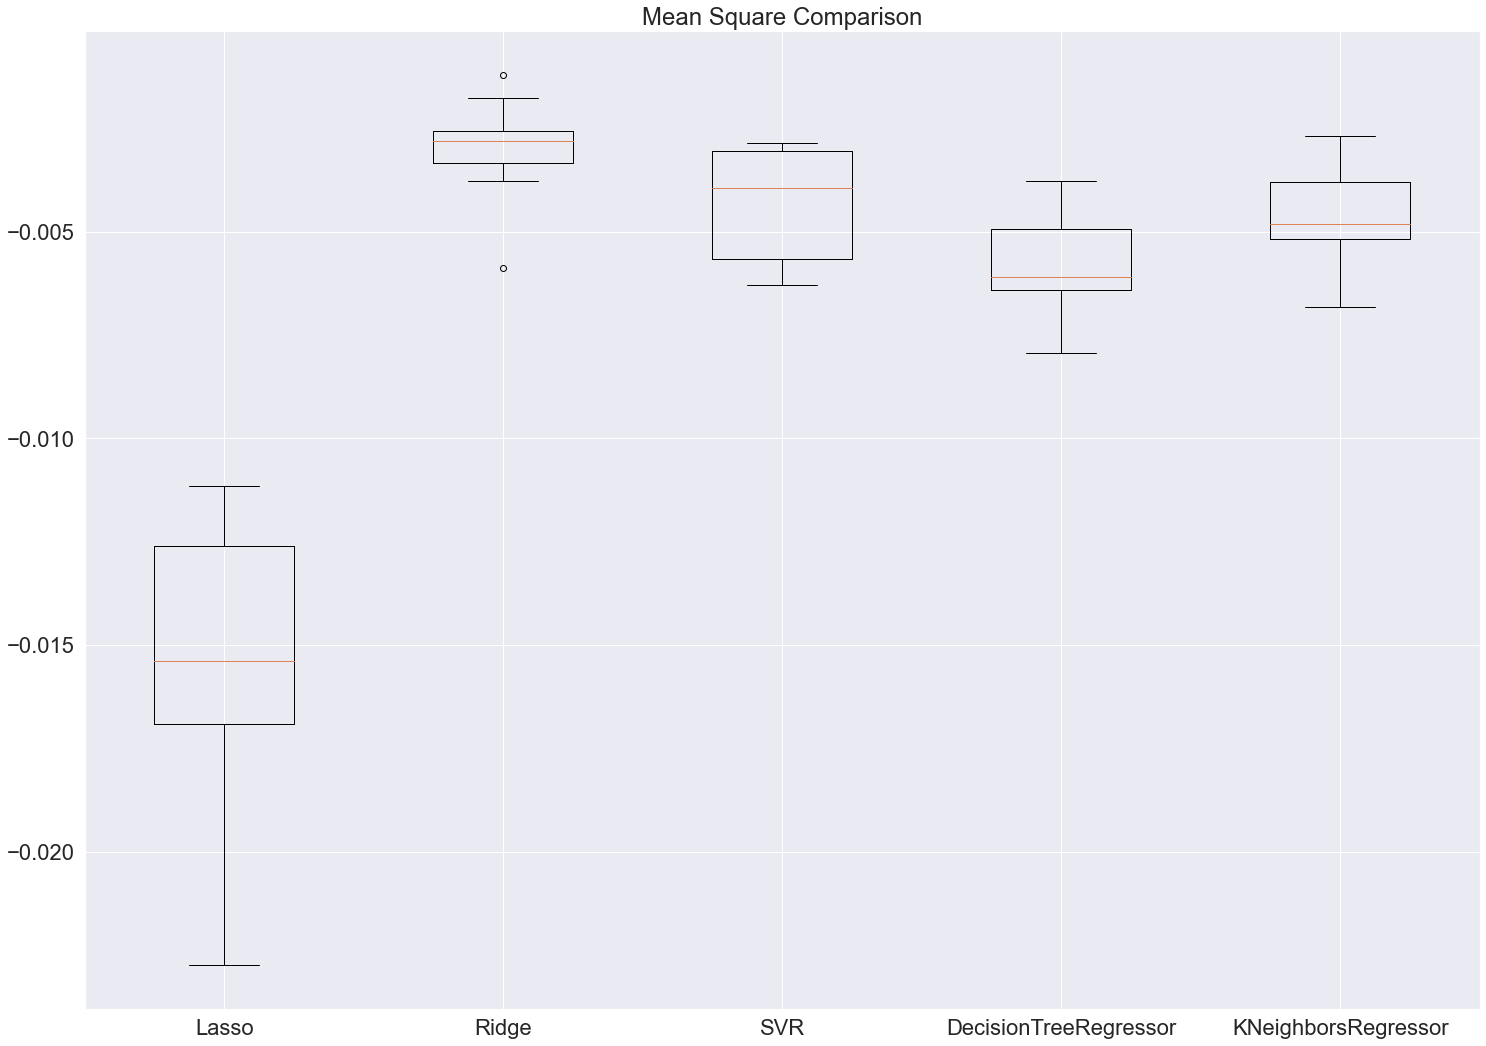

In [381]:
models = [Lasso(), Ridge(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]
results = []
m_names = []

for model in models:
  cv_model = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10, n_jobs= -1)
  print(f"Model: {model.__class__.__name__}")
  print(f"Mean Cross val error: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)
  results.append(cv_model)
  m_names.append(model.__class__.__name__)

# Compare Algorithms
plt.figure(figsize = (25,18))
plt.title('Mean Square Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

### Comparing the Ensemble models

##### Comparing R2 scores of Ridge and ensemble models.

Model: Ridge ||  R2 score: 0.8051495968223182 || Variance: 0.004102658115073104
Model: XGBRegressor ||  R2 score: 0.8321237165344538 || Variance: 0.002653563635908629
Model: RandomForestRegressor ||  R2 score: 0.8386703854711495 || Variance: 0.0009482885612857695
Model: GradientBoostingRegressor ||  R2 score: 0.8641503047928601 || Variance: 0.0008114798329108568
Model: AdaBoostRegressor ||  R2 score: 0.7922426923891994 || Variance: 0.0008663418104158804


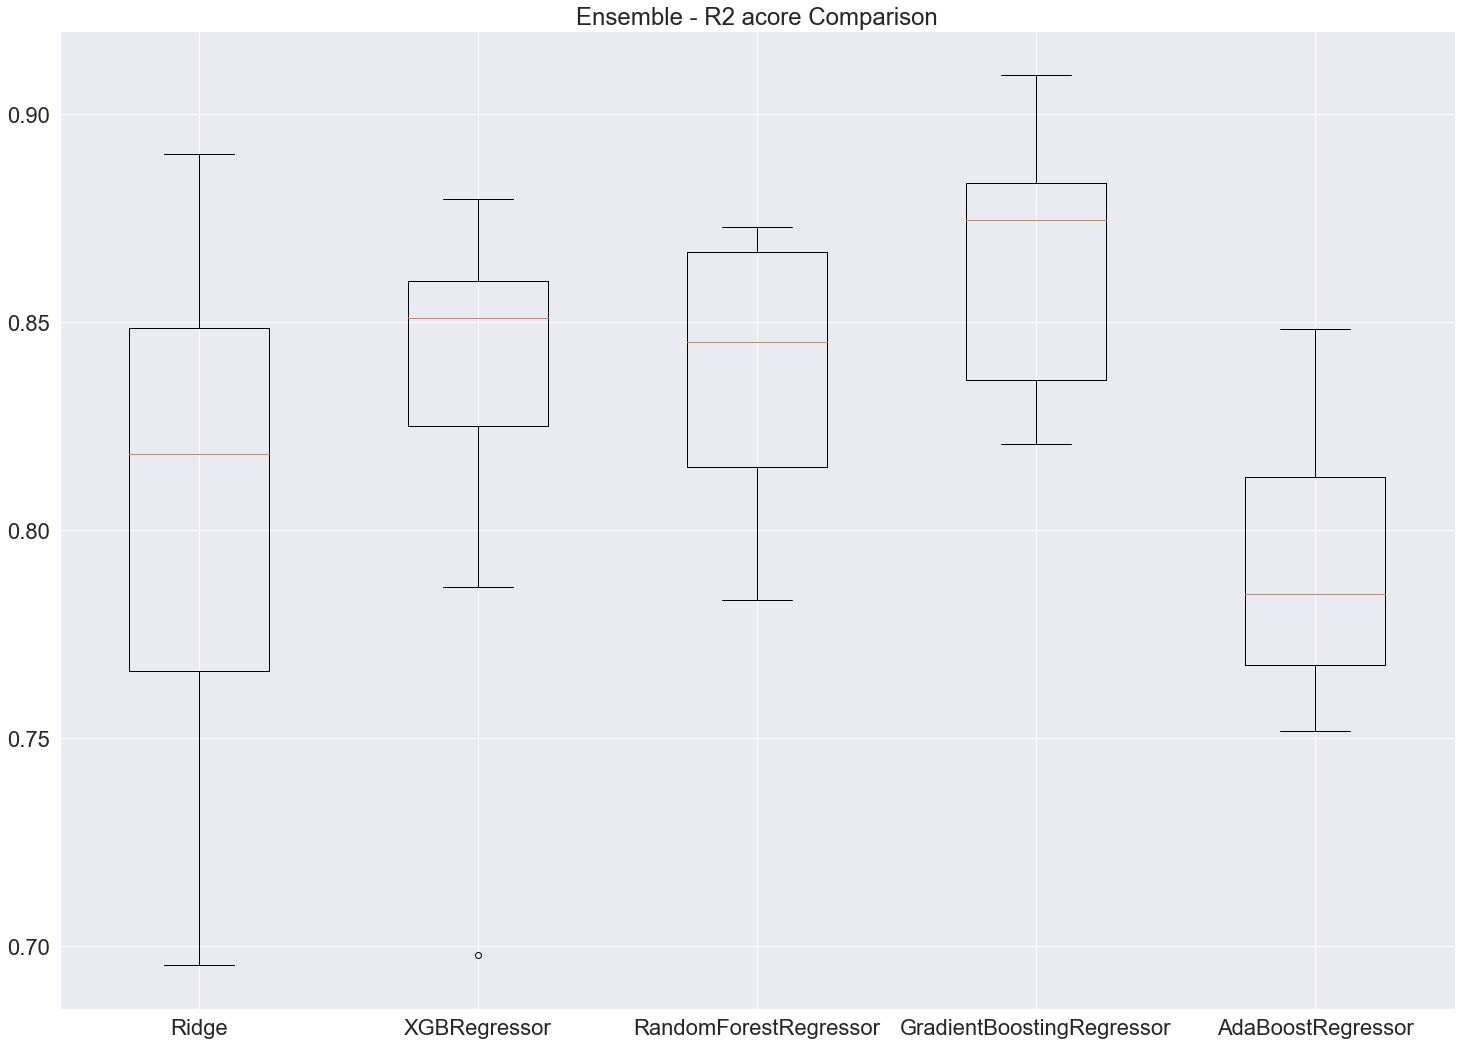

In [382]:
models = [Ridge(),XGBRegressor(objective='reg:squarederror'), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]
results = []
m_names = []

for model in models:
  cv_model = cross_val_score(model, X_train, y_train, scoring = 'r2', cv=10, n_jobs= -1)
  print(f"Model: {model.__class__.__name__} ||  R2 score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)
  results.append(cv_model)
  m_names.append(model.__class__.__name__)

# Compare Algorithms
plt.figure(figsize = (25,18))
plt.title('Ensemble - R2 acore Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

### Comparing the Mean Squared Errors of Ridge and ensemble models

Model: Ridge ||  Mean Sqared error: -0.0030065004643784004 || Variance: 1.424333633268415e-06
Model: XGBRegressor ||  Mean Sqared error: -0.0025428762816293296 || Variance: 5.165552663245902e-07
Model: RandomForestRegressor ||  Mean Sqared error: -0.0025097825055590403 || Variance: 6.42697769208068e-07
Model: GradientBoostingRegressor ||  Mean Sqared error: -0.0021163869781165284 || Variance: 4.825682633806137e-07
Model: AdaBoostRegressor ||  Mean Sqared error: -0.0031970417535540697 || Variance: 6.600475722000484e-07


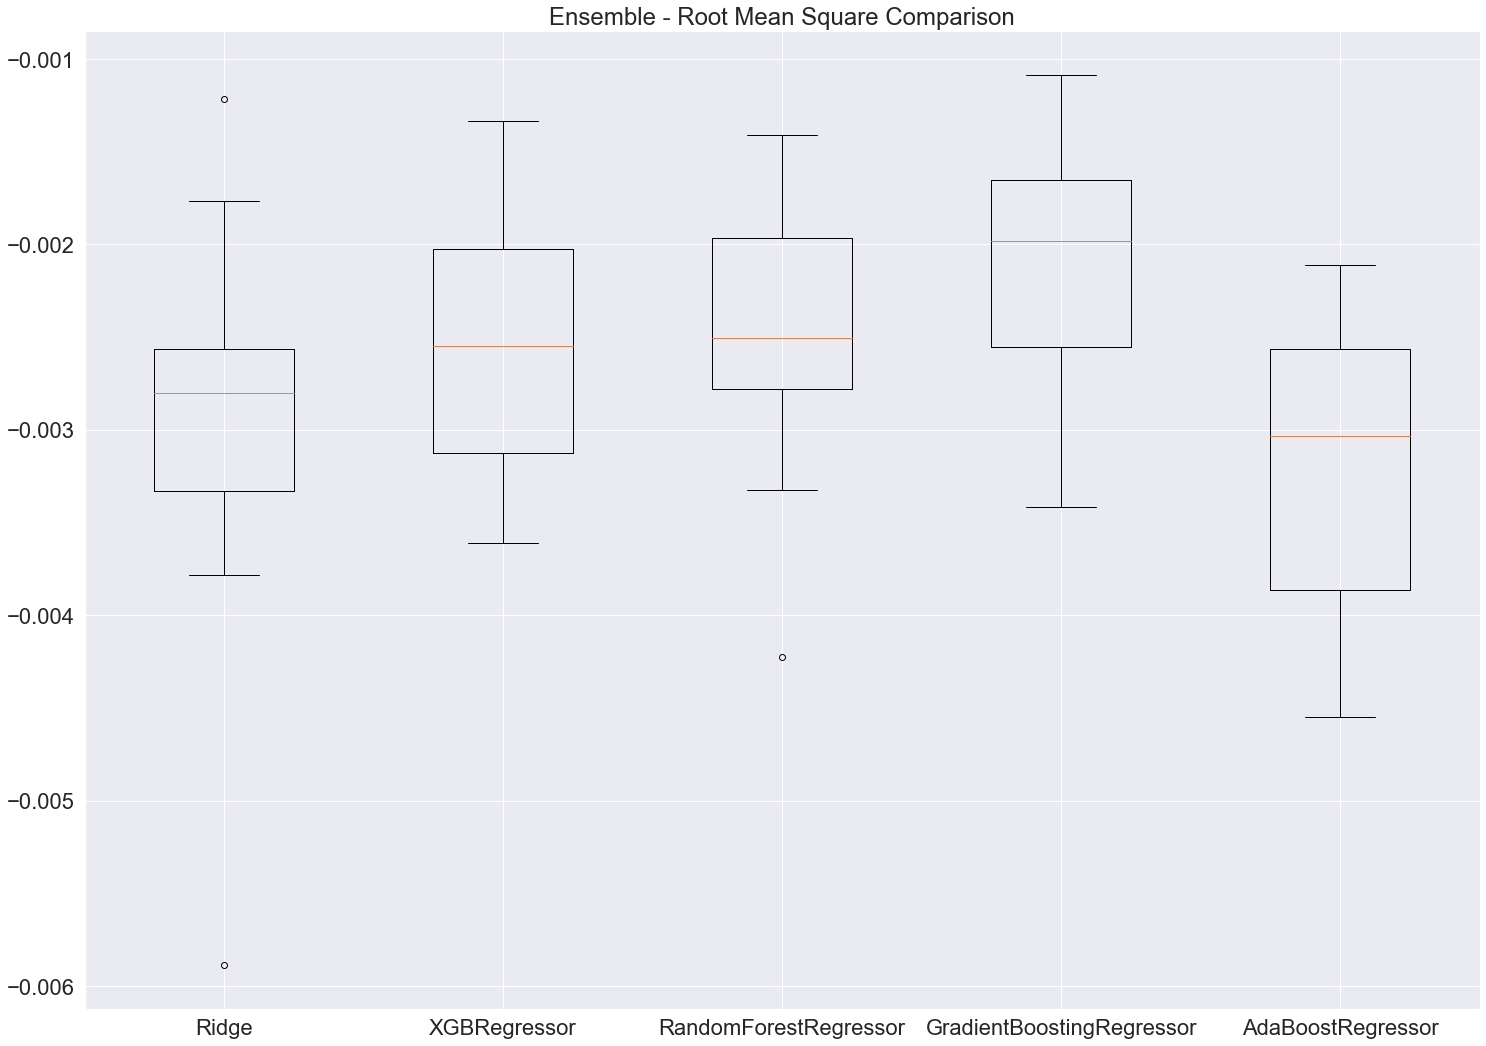

In [384]:
models = [Ridge(), XGBRegressor(objective='reg:squarederror'), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]
results = []
m_names = []

for model in models:

  cv_model = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Sqared error: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)
  results.append(cv_model)
  m_names.append(model.__class__.__name__)

# Compare Algorithms
plt.figure(figsize = (25,18))
plt.title('Ensemble - Root Mean Square Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

# Hyper parameter tuning:

In [385]:
learning_rate = [0.1]

max_depth   = [2]
n_estimators = [int(x) for x in np.linspace(start = 270, stop = 320, num = 5)]
max_features = ['auto']


params = {'learning_rate':learning_rate,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



xgbr_model = XGBRegressor(objective = 'reg:squarederror')

xgbr_modelcvo = GridSearchCV(xgbr_model, param_grid=params, scoring = 'r2', cv = 10,  verbose=10, n_jobs=-1)
xgbr_modelcvo.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[11:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [386]:
print(f'The best R2 Score is {xgbr_modelcvo.best_score_}.')
print(f'The best parameters are {xgbr_modelcvo.best_params_}.')

The best R2 Score is 0.8627099174859186.
The best parameters are {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 270}.


R2 score through hyperparameter tuning the XGBRegressor is 86.270.

Hyperparameter tuning the XGBRegressor model is 0.86176.

The best parameters for XGBRegressor are: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 270}

In [387]:
final_model = XGBRegressor(objective = 'reg:squarederror', 
                             max_depth=2, 
                             learning_rate=0.1, 
                             max_features = 'auto', 
                             n_estimators=270)

In [388]:
final_model.fit(X_train, y_train)
y_train_preds = final_model.predict(X_train)
y_test_preds = final_model.predict(X_test)

[11:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [389]:
print(f'R2 score of Train data: {r2_score(y_train, y_train_preds)}')
print(f'Mean Square Error of Train data: {mean_squared_error(y_train, y_train_preds)}')
print(f'R2 score of Test data: {r2_score(y_test, y_test_preds)}')
print(f'Mean Square Error of Test data: {mean_squared_error(y_test, y_test_preds)}')

R2 score of Train data: 0.9574221726877681
Mean Square Error of Train data: 0.0006598728311986845
R2 score of Test data: 0.9008279495930961
Mean Square Error of Test data: 0.001905298412435005


# Final model training with whole train dataset

In [390]:
print(f'The crossval score of the final model with the whole train data is: {cross_val_score(final_model, X, y_enc, cv = 10).mean()} and the Variance is: {cross_val_score(final_model, X, y_enc, cv = 10).var()}')

[11:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  Thi

# Training the final model with the whole train dataset

In [392]:
final_model.fit(X, y_enc)
y_preds = final_model.predict(X)

[11:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [393]:
print(f'R2 score of whole Train data: {r2_score(y_enc, y_preds)}')
print(f'Mean Square Error of whole Train data: {mean_squared_error(y_enc, y_preds)}')

R2 score of whole Train data: 0.9525685926194101
Mean Square Error of whole Train data: 0.0007880907905494412


# Loading Test Data Now:

In [395]:
test_df = pd.read_csv('housing_test.csv')

In [396]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [397]:
test_df.shape

(292, 80)

In [398]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [399]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

# Statistical Summary:

In [400]:
test_df.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

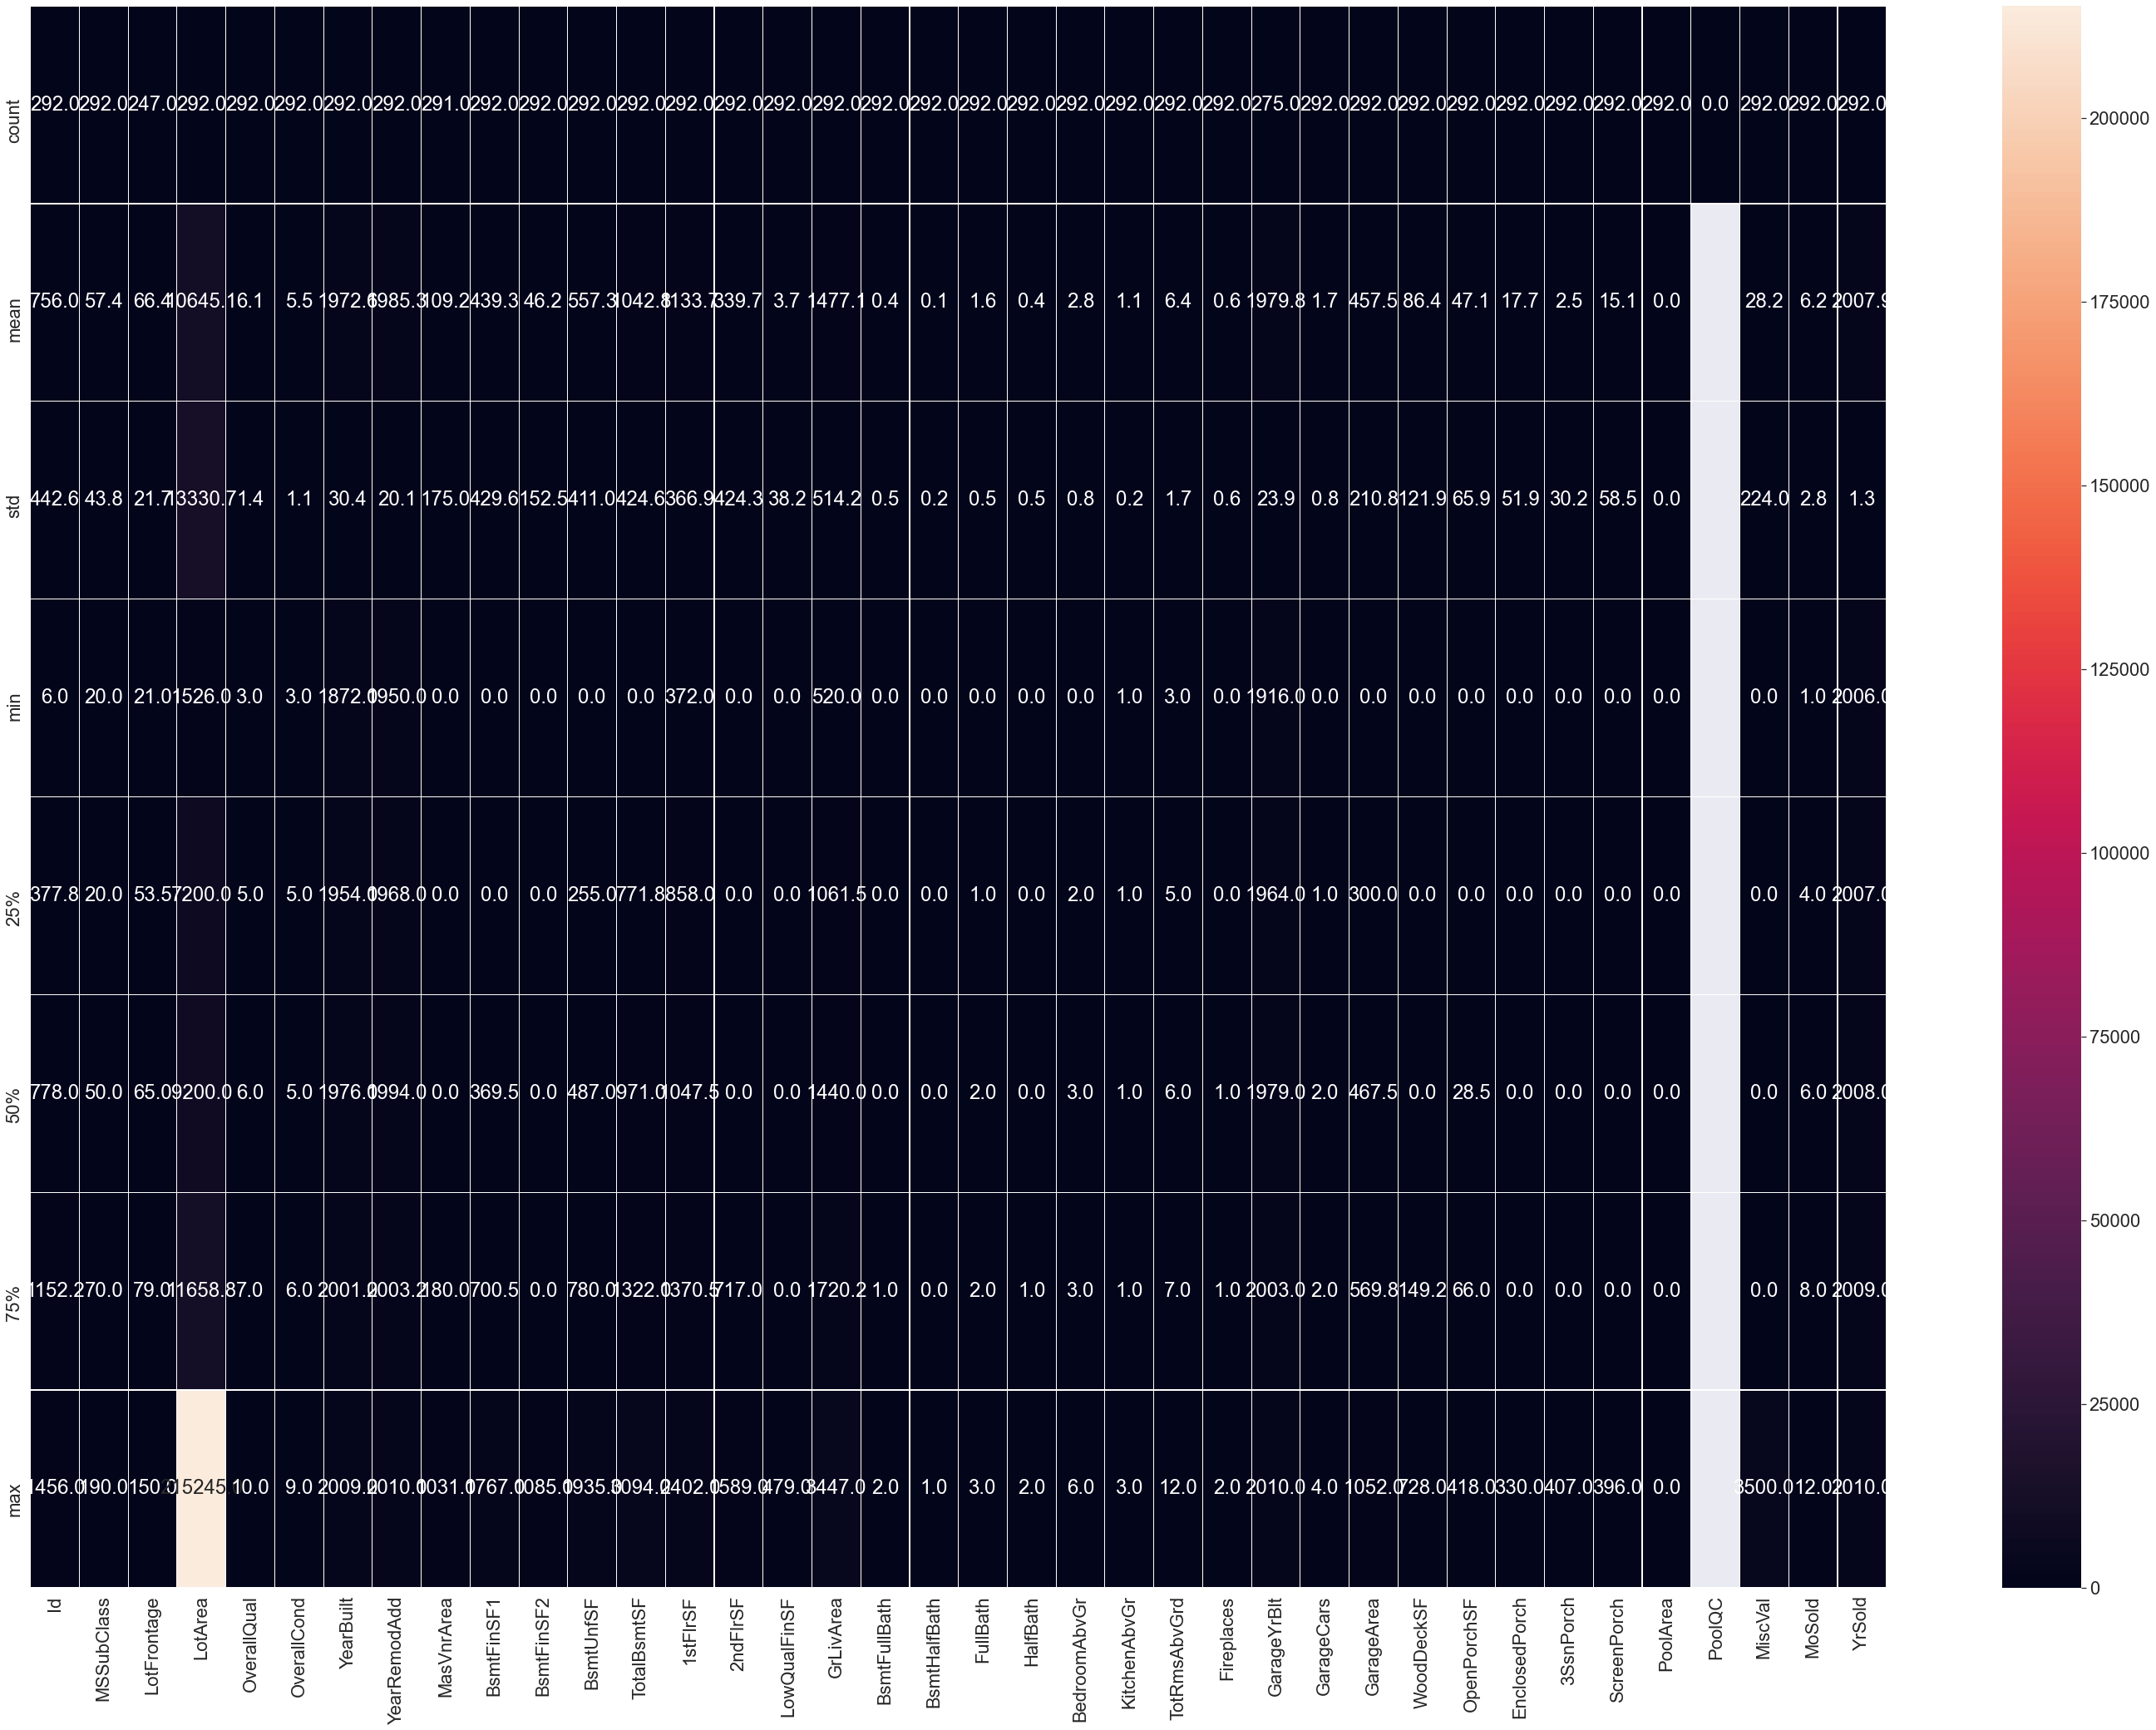

In [402]:
plt.figure(figsize=(50,35))
sns.heatmap(test_df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Data Cleaning:

In [403]:
test_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [404]:
test_df['Alley'].fillna('NA',inplace=True)

In [405]:
test_df[test_df['Alley'].isnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 80 columns]

In [406]:
test_df[test_df['Alley']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave    NA      IR1   
1    1018         120       RL          NaN     5814   Pave    NA      IR1   
2     929          20       RL          NaN    11838   Pave    NA      Reg   
3    1148          70       RL         75.0    12000   Pave    NA      Reg   
4    1227          60       RL         86.0    14598   Pave    NA      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave    NA      Reg   
288  1048          20       RL         57.0     9245   Pave    NA      IR2   
289    17          20       RL          NaN    11241   Pave    NA      IR1   
290   523          50       RM         50.0     5000   Pave    NA      Reg   
291  1379         160       RM         21.0     1953   Pave    NA      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[278 rows x 80 columns]

In [407]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [408]:
test_df['FireplaceQu'].unique()

array(['Gd', 'Ex', 'TA', nan, 'Fa', 'Po'], dtype=object)

In [409]:
test_df['FireplaceQu'].fillna('NA',inplace=True)

In [410]:
test_df['FireplaceQu'].unique()

array(['Gd', 'Ex', 'TA', 'NA', 'Fa', 'Po'], dtype=object)

In [411]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [412]:
test_df['PoolQC'].unique()

array([nan])

In [413]:
test_df['PoolQC'].fillna('NA',inplace=True)

In [414]:
test_df['PoolQC'].unique()

array(['NA'], dtype=object)

In [415]:
test_df['MiscFeature'].unique()

array([nan, 'Othr', 'Shed'], dtype=object)

In [416]:
test_df['MiscFeature'].fillna('NA', inplace=True)

In [417]:
test_df['PoolQC'].unique()

array(['NA'], dtype=object)

In [418]:
test_df['PoolQC'].fillna('NA', inplace=True)

In [419]:
test_df['PoolQC'].unique()

array(['NA'], dtype=object)

In [420]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [421]:
test_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [422]:
test_df['Fence'].fillna('NA',inplace=True)

In [423]:
test_df['FireplaceQu'].unique()

array(['Gd', 'Ex', 'TA', 'NA', 'Fa', 'Po'], dtype=object)

In [424]:
test_df['FireplaceQu'].fillna('NA', inplace=True)

In [425]:
test_df['GarageType'].unique()

array(['Attchd', 'BuiltIn', nan, 'Basment', 'Detchd', '2Types', 'CarPort'],
      dtype=object)

In [426]:
test_df['GarageType'].fillna('NA',inplace=True)

In [427]:
test_df['GarageYrBlt'].unique()

array([2005., 1984., 2001., 1941., 2007.,   nan, 1989., 1998., 1920.,
       1970., 1954., 1963., 2006., 1978., 1964., 1999., 1987., 1930.,
       1977., 1967., 1925., 1968., 1922., 2003., 2004., 1957., 1924.,
       2000., 1994., 1972., 1948., 1959., 1965., 2008., 1979., 1926.,
       1996., 1973., 1976., 1992., 1958., 1960., 2002., 1950., 1928.,
       1980., 1953., 1962., 1951., 1940., 1990., 1988., 1955., 1956.,
       1949., 1931., 2009., 1975., 1997., 1966., 1993., 1939., 1969.,
       1971., 1916., 1974., 1982., 1991., 2010., 1938., 1995., 1985.])

In [428]:
test_df[test_df['GarageYrBlt'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5     650         180       RM         21.0     1936   Pave    NA      Reg   
16   1408          20       RL          NaN     8780   Pave    NA      IR1   
23    706         190       RM         70.0     5600   Pave    NA      Reg   
123  1451          90       RL         60.0     9000   Pave    NA      Reg   
129    49         190       RM         33.0     4456   Pave    NA      Reg   
154  1124          20       RL         50.0     9405   Pave    NA      Reg   
157  1174          50       RL        138.0    18030   Pave    NA      IR1   
164   432          50       RM         60.0     5586   Pave    NA      IR1   
187   128          45       RM         55.0     4388   Pave    NA      IR1   
193   529          30       RL         58.0     9098   Pave    NA      IR1   
195   621          30       RL         45.0     8248   Pave  Grvl      Reg   
210   242          30       RM         40.0     3880   Pave    NA      Reg   
214  1258          30       RL         56.0     4060   Pave    NA      Reg   
215  1350          70       RM         50.0     5250   Pave  Pave      Reg   
217   442          90       RL         92.0    12108   Pave    NA      Reg   
218    90          20       RL         60.0     8070   Pave    NA      Reg   
256   109          50       RM         85.0     8500   Pave    NA      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
5           Lvl    AllPub  ...           0        0     NA  MnPrv          NA   
16          Lvl    AllPub  ...           0        0     NA  MnPrv          NA   
23          Lvl    AllPub  ...           0        0     NA     NA        Othr   
123         Lvl    AllPub  ...           0        0     NA     NA          NA   
129         Lvl    AllPub  ...           0        0     NA     NA          NA   
154         Lvl    AllPub  ...           0        0     NA     NA          NA   
157         Bnk    AllPub  ...           0        0     NA  MnPrv          NA   
164         Bnk    AllPub  ...           0        0     NA  MnPrv          NA   
187         Bnk    AllPub  ...           0        0     NA     NA          NA   
193         Lvl    AllPub  ...           0        0     NA     NA          NA   
195         Lvl    AllPub  ...           0        0     NA     NA          NA   
210         Lvl    AllPub  ...           0        0     NA     NA          NA   
214         Lvl    AllPub  ...           0        0     NA     NA          NA   
215         Lvl    AllPub  ...           0        0     NA     NA          NA   
217         Lvl    AllPub  ...           0        0     NA     NA          NA   
218         Lvl    AllPub  ...           0        0     NA     NA          NA   
256         Lvl    AllPub  ...           0        0     NA     NA          NA   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
5         0     12    2007        WD         Normal  
16        0      3    2009        WD         Normal  
23     3500      7    2010        WD         Normal  
123       0      9    2009        WD         Normal  
129       0      6    2009       New        Partial  
154       0      6    2009        WD         Normal  
157       0      3    2007        WD         Normal  
164       0      9    2008     ConLD        Abnorml  
187       0      6    2007        WD         Normal  
193       0      7    2007        WD         Normal  
195       0      9    2008        WD         Normal  
210       0      8    2007        WD         Normal  
214       0      7    2009        WD         Normal  
215       0     12    2008        WD         Normal  
217       0      9    2008        WD         Normal  
218       0      8    2007        WD         Normal  
256       0      8    2007        WD         Normal  

[17 rows x 80 columns]

In [429]:
test_df[test_df['GarageType']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5     650         180       RM         21.0     1936   Pave    NA      Reg   
16   1408          20       RL          NaN     8780   Pave    NA      IR1   
23    706         190       RM         70.0     5600   Pave    NA      Reg   
123  1451          90       RL         60.0     9000   Pave    NA      Reg   
129    49         190       RM         33.0     4456   Pave    NA      Reg   
154  1124          20       RL         50.0     9405   Pave    NA      Reg   
157  1174          50       RL        138.0    18030   Pave    NA      IR1   
164   432          50       RM         60.0     5586   Pave    NA      IR1   
187   128          45       RM         55.0     4388   Pave    NA      IR1   
193   529          30       RL         58.0     9098   Pave    NA      IR1   
195   621          30       RL         45.0     8248   Pave  Grvl      Reg   
210   242          30       RM         40.0     3880   Pave    NA      Reg   
214  1258          30       RL         56.0     4060   Pave    NA      Reg   
215  1350          70       RM         50.0     5250   Pave  Pave      Reg   
217   442          90       RL         92.0    12108   Pave    NA      Reg   
218    90          20       RL         60.0     8070   Pave    NA      Reg   
256   109          50       RM         85.0     8500   Pave    NA      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
5           Lvl    AllPub  ...           0        0     NA  MnPrv          NA   
16          Lvl    AllPub  ...           0        0     NA  MnPrv          NA   
23          Lvl    AllPub  ...           0        0     NA     NA        Othr   
123         Lvl    AllPub  ...           0        0     NA     NA          NA   
129         Lvl    AllPub  ...           0        0     NA     NA          NA   
154         Lvl    AllPub  ...           0        0     NA     NA          NA   
157         Bnk    AllPub  ...           0        0     NA  MnPrv          NA   
164         Bnk    AllPub  ...           0        0     NA  MnPrv          NA   
187         Bnk    AllPub  ...           0        0     NA     NA          NA   
193         Lvl    AllPub  ...           0        0     NA     NA          NA   
195         Lvl    AllPub  ...           0        0     NA     NA          NA   
210         Lvl    AllPub  ...           0        0     NA     NA          NA   
214         Lvl    AllPub  ...           0        0     NA     NA          NA   
215         Lvl    AllPub  ...           0        0     NA     NA          NA   
217         Lvl    AllPub  ...           0        0     NA     NA          NA   
218         Lvl    AllPub  ...           0        0     NA     NA          NA   
256         Lvl    AllPub  ...           0        0     NA     NA          NA   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
5         0     12    2007        WD         Normal  
16        0      3    2009        WD         Normal  
23     3500      7    2010        WD         Normal  
123       0      9    2009        WD         Normal  
129       0      6    2009       New        Partial  
154       0      6    2009        WD         Normal  
157       0      3    2007        WD         Normal  
164       0      9    2008     ConLD        Abnorml  
187       0      6    2007        WD         Normal  
193       0      7    2007        WD         Normal  
195       0      9    2008        WD         Normal  
210       0      8    2007        WD         Normal  
214       0      7    2009        WD         Normal  
215       0     12    2008        WD         Normal  
217       0      9    2008        WD         Normal  
218       0      8    2007        WD         Normal  
256       0      8    2007        WD         Normal  

[17 rows x 80 columns]

In [430]:
test_df['GarageAvlb'] = np.where(test_df['GarageYrBlt'].isnull(),0,1)

In [432]:
test_df['GarageAvlb'].unique()

array([1, 0])

In [433]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave    NA      IR1   
1  1018         120       RL          NaN     5814   Pave    NA      IR1   
2   929          20       RL          NaN    11838   Pave    NA      Reg   
3  1148          70       RL         75.0    12000   Pave    NA      Reg   
4  1227          60       RL         86.0    14598   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         HLS    AllPub  ...        0     NA    NA          NA       0      7   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      8   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      6   
3         Bnk    AllPub  ...        0     NA    NA          NA       0      7   
4         Lvl    AllPub  ...        0     NA    NA          NA       0      1   

  YrSold  SaleType  SaleCondition  GarageAvlb  
0   2007        WD         Normal           1  
1   2009       COD        Abnorml           1  
2   2009        WD         Normal           1  
3   2009        WD         Normal           1  
4   2008        WD         Normal           1  

[5 rows x 81 columns]

In [434]:
test_df['GarageYrBlt'].fillna(test_df['YearBuilt'],inplace=True)

In [435]:
test_df['GarageYrBlt'].unique()

array([2005., 1984., 2001., 1941., 2007., 1970., 1989., 1998., 1920.,
       1954., 1963., 2006., 1978., 1985., 1964., 1999., 1987., 1930.,
       1977., 1967., 1925., 1968., 1922., 2003., 2004., 1957., 1924.,
       2000., 1994., 1972., 1948., 1959., 1965., 2008., 1979., 1926.,
       1996., 1973., 1976., 1992., 1958., 1960., 2002., 1950., 1928.,
       1980., 1953., 1962., 1951., 1940., 1990., 1974., 1988., 1955.,
       1956., 1949., 1931., 2009., 1947., 1975., 1946., 1997., 1966.,
       1993., 1939., 1914., 1969., 1971., 1945., 1916., 1872., 1982.,
       1991., 1919., 2010., 1938., 1995.])

In [436]:
test_df['GarageYrBlt'].unique()

array([2005., 1984., 2001., 1941., 2007., 1970., 1989., 1998., 1920.,
       1954., 1963., 2006., 1978., 1985., 1964., 1999., 1987., 1930.,
       1977., 1967., 1925., 1968., 1922., 2003., 2004., 1957., 1924.,
       2000., 1994., 1972., 1948., 1959., 1965., 2008., 1979., 1926.,
       1996., 1973., 1976., 1992., 1958., 1960., 2002., 1950., 1928.,
       1980., 1953., 1962., 1951., 1940., 1990., 1974., 1988., 1955.,
       1956., 1949., 1931., 2009., 1947., 1975., 1946., 1997., 1966.,
       1993., 1939., 1914., 1969., 1971., 1945., 1916., 1872., 1982.,
       1991., 1919., 2010., 1938., 1995.])

In [437]:
test_df['GarageFinish'].fillna('NA', inplace=True)

In [438]:
test_df['GarageQual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [439]:
test_df['GarageQual'].fillna('NA',inplace=True)

In [440]:
test_df['GarageCond'].unique()

array(['TA', nan, 'Fa', 'Po', 'Ex', 'Gd'], dtype=object)

In [441]:
test_df['GarageCond'].fillna('NA', inplace=True)

In [442]:
test_df['MasVnrType'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn'], dtype=object)

In [443]:
test_df['MasVnrType'].value_counts()

None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

In [444]:
test_df[test_df['MasVnrType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
31  937          20       RL         67.0    10083   Pave    NA      Reg   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
31         Lvl    AllPub  ...        0     NA    NA          NA       0   

   MoSold YrSold  SaleType  SaleCondition  GarageAvlb  
31      8   2009        WD         Normal           1  

[1 rows x 81 columns]

In [445]:
test_df['MasVnrType'].fillna('None', inplace = True)

In [446]:
test_df['BsmtQual'].unique()

array(['Ex', 'Gd', 'TA', nan, 'Fa'], dtype=object)

In [447]:
test_df['BsmtQual'].value_counts()

TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64

In [448]:
test_df[test_df['BsmtQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
23    706         190       RM         70.0     5600   Pave    NA      Reg   
30   1217          90       RM         68.0     8930   Pave    NA      Reg   
119   647          20       RL         60.0     7200   Pave    NA      Reg   
128  1001          20       RL         74.0    10206   Pave    NA      Reg   
142   737          90       RL         60.0     8544   Pave    NA      Reg   
148   260          20       RM         70.0    12702   Pave    NA      Reg   
270   372          50       RL         80.0    17120   Pave    NA      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
23          Lvl    AllPub  ...        0     NA    NA        Othr    3500   
30          Lvl    AllPub  ...        0     NA    NA          NA       0   
119         Lvl    AllPub  ...        0     NA    NA          NA       0   
128         Lvl    AllPub  ...        0     NA    NA          NA       0   
142         Lvl    AllPub  ...        0     NA    NA          NA       0   
148         Lvl    AllPub  ...        0     NA    NA          NA       0   
270         Lvl    AllPub  ...        0     NA    NA          NA       0   

    MoSold YrSold  SaleType  SaleCondition  GarageAvlb  
23       7   2010        WD         Normal           0  
30       4   2010        WD         Normal           1  
119      7   2008        WD         Normal           1  
128      7   2009        WD         Normal           1  
142      7   2006        WD         Normal           1  
148     12   2008        WD         Normal           1  
270      7   2008        WD         Normal           1  

[7 rows x 81 columns]

In [449]:
test_df['BsmtQual'].fillna('NA', inplace=True)

In [450]:
test_df['BsmtCond'].fillna('NA', inplace=True)

In [451]:
test_df['BsmtExposure'].unique()

array(['Gd', 'Av', 'No', 'Mn', nan], dtype=object)

In [452]:
test_df['BsmtExposure'].fillna('NA', inplace=True)

In [453]:
test_df['BsmtFinType1'].unique()

array(['GLQ', 'Unf', 'Rec', 'BLQ', 'ALQ', nan, 'LwQ'], dtype=object)

In [454]:
test_df['BsmtFinType1'].fillna('NA', inplace=True)
test_df['BsmtFinType2'].fillna('NA', inplace=True)

In [455]:
test_df[test_df['BsmtFinType1']=='NA']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
23    706         190       RM         70.0     5600   Pave    NA      Reg   
30   1217          90       RM         68.0     8930   Pave    NA      Reg   
119   647          20       RL         60.0     7200   Pave    NA      Reg   
128  1001          20       RL         74.0    10206   Pave    NA      Reg   
142   737          90       RL         60.0     8544   Pave    NA      Reg   
148   260          20       RM         70.0    12702   Pave    NA      Reg   
270   372          50       RL         80.0    17120   Pave    NA      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
23          Lvl    AllPub  ...        0     NA    NA        Othr    3500   
30          Lvl    AllPub  ...        0     NA    NA          NA       0   
119         Lvl    AllPub  ...        0     NA    NA          NA       0   
128         Lvl    AllPub  ...        0     NA    NA          NA       0   
142         Lvl    AllPub  ...        0     NA    NA          NA       0   
148         Lvl    AllPub  ...        0     NA    NA          NA       0   
270         Lvl    AllPub  ...        0     NA    NA          NA       0   

    MoSold YrSold  SaleType  SaleCondition  GarageAvlb  
23       7   2010        WD         Normal           0  
30       4   2010        WD         Normal           1  
119      7   2008        WD         Normal           1  
128      7   2009        WD         Normal           1  
142      7   2006        WD         Normal           1  
148     12   2008        WD         Normal           1  
270      7   2008        WD         Normal           1  

[7 rows x 81 columns]

In [456]:
test_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [457]:
test_df[test_df['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
31  937          20       RL         67.0    10083   Pave    NA      Reg   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
31         Lvl    AllPub  ...        0     NA    NA          NA       0   

   MoSold YrSold  SaleType  SaleCondition  GarageAvlb  
31      8   2009        WD         Normal           1  

[1 rows x 81 columns]

In [458]:
(test_df['LotFrontage'].isnull().sum()/test_df.shape[0])*100

15.41095890410959

In [459]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave    NA      IR1   
1  1018         120       RL          NaN     5814   Pave    NA      IR1   
2   929          20       RL          NaN    11838   Pave    NA      Reg   
3  1148          70       RL         75.0    12000   Pave    NA      Reg   
4  1227          60       RL         86.0    14598   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         HLS    AllPub  ...        0     NA    NA          NA       0      7   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      8   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      6   
3         Bnk    AllPub  ...        0     NA    NA          NA       0      7   
4         Lvl    AllPub  ...        0     NA    NA          NA       0      1   

  YrSold  SaleType  SaleCondition  GarageAvlb  
0   2007        WD         Normal           1  
1   2009       COD        Abnorml           1  
2   2009        WD         Normal           1  
3   2009        WD         Normal           1  
4   2008        WD         Normal           1  

[5 rows x 81 columns]

In [465]:
test_df.drop(['LotFrontage','GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1, inplace=True)

In [460]:
test_df['MSSubClass'] = test_df['MSSubClass'].astype('str')

In [461]:
test_df['YearBuilt'] = test_df['YearBuilt'].astype('str')

In [462]:
test_df['YearRemodAdd'] = test_df['YearRemodAdd'].astype('str')

In [464]:
test_df['MoSold'].unique()

array([ 7,  8,  6,  1, 12,  5,  2,  4,  3, 10, 11,  9], dtype=int64)

In [466]:
test_df['MoSold'] = test_df['MoSold'].astype('str')

In [467]:
test_df['YrSold'] = test_df['YrSold'].astype('str')

In [468]:
test_df['FullBath'].unique()

array([2, 1, 0, 3], dtype=int64)

In [469]:
test_df['HalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [470]:
test_df['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [471]:
test_df['Electrical'].mode()[0]

'SBrkr'

In [472]:
test_df['Electrical'].fillna(test_df['Electrical'].mode()[0], inplace = True)

In [473]:
test_df['BedroomAbvGr'].unique()

array([3, 1, 4, 2, 0, 5, 6], dtype=int64)

### Converting 'object' datatype into 'category' datatype.

In [476]:
for col in test_df.columns:
  if test_df[col].dtype == 'object':
    test_df[col] = test_df[col].astype('category')

In [477]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             292 non-null    int64   
 1   MSSubClass     292 non-null    category
 2   MSZoning       292 non-null    category
 3   LotArea        292 non-null    int64   
 4   Street         292 non-null    category
 5   Alley          292 non-null    category
 6   LotShape       292 non-null    category
 7   LandContour    292 non-null    category
 8   Utilities      292 non-null    category
 9   LotConfig      292 non-null    category
 10  LandSlope      292 non-null    category
 11  Neighborhood   292 non-null    category
 12  Condition1     292 non-null    category
 13  Condition2     292 non-null    category
 14  BldgType       292 non-null    category
 15  HouseStyle     292 non-null    category
 16  OverallQual    292 non-null    int64   
 17  OverallCond    292 non-null    int6

In [479]:
test_cat_df = test_df.select_dtypes(include = 'category')
test_num_trans_df = test_df.select_dtypes(exclude = 'category')

In [481]:
test_scaled_df = pd.DataFrame(mms.transform(test_num_trans_df.drop(['Id'], axis=1)), columns=test_num_trans_df.drop(['Id'], axis=1).columns)

In [482]:
test_num_trans_df

Id  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0     337    14157            9            5       200.0        1249   
1    1018     5814            8            5         0.0        1036   
2     929    11838            8            5         0.0           0   
3    1148    12000            7            7         0.0         275   
4    1227    14598            6            5        74.0           0   
..    ...      ...          ...          ...         ...         ...   
287    83    10206            8            5       468.0          33   
288  1048     9245            5            5         0.0         686   
289    17    11241            6            7       180.0         578   
290   523     5000            6            7         0.0         399   
291  1379     1953            6            5       408.0         309   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  ...  Fireplaces  \
0             0        673         1922         0  ...           1   
1             0        184         1220         0  ...           1   
2             0       1753         1753         0  ...           1   
3             0        429          704       704  ...           1   
4             0        894          894      1039  ...           1   
..          ...        ...          ...       ...  ...         ...   
287           0       1530         1563         0  ...           1   
288           0        304          990         0  ...           0   
289           0        426         1004         0  ...           1   
290           0        605         1004       660  ...           2   
291           0        174          483       504  ...           0   

     GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0             3         178           51              0          0   
1             2          63            0              0          0   
2             2         202          151              0          0   
3             1           0            0              0          0   
4             3         100           18              0          0   
..          ...         ...          ...            ...        ...   
287           3         144           99              0          0   
288           2           0            0              0          0   
289           2           0            0              0          0   
290           2           0           24             36          0   
291           1          72            0              0          0   

     ScreenPorch  PoolArea  MiscVal  GarageAvlb  
0              0         0        0           1  
1              0         0        0           1  
2              0         0        0           1  
3              0         0        0           1  
4              0         0        0           1  
..           ...       ...      ...         ...  
287            0         0        0           1  
288            0         0        0           1  
289            0         0      700           1  
290            0         0        0           1  
291            0         0        0           1  

[292 rows x 28 columns]

## Encoding

In [486]:
test_enc_cat_df = pd.DataFrame(en.transform(test_cat_df).toarray())
test_enc_cat_df

0    1    2    3    4    5    6    7    8    9    ...  457  458  459  \
0    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
287  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
288  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
289  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
290  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
291  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     460  461  462  463  464  465  466  
0    1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    1.0  0.0  0.0  0.0  0.0  1.0  0.0  
3    1.0  0.0  0.0  0.0  0.0  1.0  0.0  
4    1.0  0.0  0.0  0.0  0.0  1.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
287  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
288  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
289  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
290  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
291  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[292 rows x 467 columns]

# Joining transformed and scaled numerical features and encoded categorical features

In [488]:
test_en = test_scaled_df.join(test_enc_cat_df)

In [489]:
test_en

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0    1466.319700     0.888889         0.50  246.690105  105.844948   
1     601.579600     0.777778         0.50    0.000000   87.794529   
2    1225.958644     0.777778         0.50    0.000000    0.000000   
3    1242.749713     0.666667         0.75    0.000000   23.304532   
4    1512.028723     0.555556         0.50   91.275339    0.000000   
..           ...          ...          ...         ...         ...   
287  1056.804162     0.777778         0.50  577.254846    2.796544   
288   957.197877     0.444444         0.50    0.000000   58.134215   
289  1164.080441     0.555556         0.75  222.021095   48.981890   
290   517.209656     0.555556         0.75    0.000000   33.812758   
291   201.392434     0.555556         0.50  503.247814   26.185820   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF    2ndFlrSF  LowQualFinSF  ...  457  \
0           0.0  10.531972     2.491291    0.000000           0.0  ...  0.0   
1           0.0   2.879469     1.581361    0.000000           0.0  ...  0.0   
2           0.0  27.433204     2.272234    0.000000           0.0  ...  0.0   
3           0.0   6.713545     0.912523  591.629127           0.0  ...  0.0   
4           0.0  13.990465     1.158800  873.157191           0.0  ...  0.0   
..          ...        ...          ...         ...           ...  ...  ...   
287         0.0  23.943413     2.025956    0.000000           0.0  ...  0.0   
288         0.0   4.757384     1.283235    0.000000           0.0  ...  0.0   
289         0.0   6.666597     1.301382    0.000000           0.0  ...  0.0   
290         0.0   9.467820     1.301382  554.652306           0.0  ...  0.0   
291         0.0   2.722976     0.626063  423.552670           0.0  ...  0.0   

     458  459  460  461  462  463  464  465  466  
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
4    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  
287  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
288  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
289  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
290  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
291  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[292 rows x 494 columns]

# ****************************************************************************************************************************

# Now Testing Train Data with Test data for predictions

In [491]:
y_predictions = final_model.predict(test_en)

In [492]:
y_predictions

array([0.64452094, 0.5482632 , 0.7300416 , 0.61863446, 0.6955559 ,
       0.38350126, 0.42211598, 0.6162427 , 0.5425578 , 0.49464792,
       0.46974763, 0.37391055, 0.53519994, 0.44734803, 0.71543163,
       0.4533107 , 0.40422207, 0.40826863, 0.62491864, 0.6097996 ,
       0.55434895, 0.6218265 , 0.4325529 , 0.40936688, 0.38713425,
       0.3941496 , 0.66042304, 0.42750674, 0.563597  , 0.42963633,
       0.5477322 , 0.5510285 , 0.54483324, 0.48424163, 0.5556616 ,
       0.69594884, 0.5546265 , 0.45156378, 0.5277784 , 0.5114594 ,
       0.38485408, 0.663832  , 0.73961675, 0.5623622 , 0.45760134,
       0.4950217 , 0.40921178, 0.47355795, 0.5597973 , 0.6290084 ,
       0.47343406, 0.48361728, 0.50168556, 0.49934563, 0.7365878 ,
       0.42113099, 0.59691924, 0.723211  , 0.35160577, 0.7574291 ,
       0.42038575, 0.5205699 , 0.40310088, 0.4706747 , 0.5509328 ,
       0.39771697, 0.44402844, 0.5430067 , 0.45041326, 0.48464814,
       0.6553587 , 0.48061523, 0.6561745 , 0.46097797, 0.43538

<AxesSubplot:ylabel='Features'>

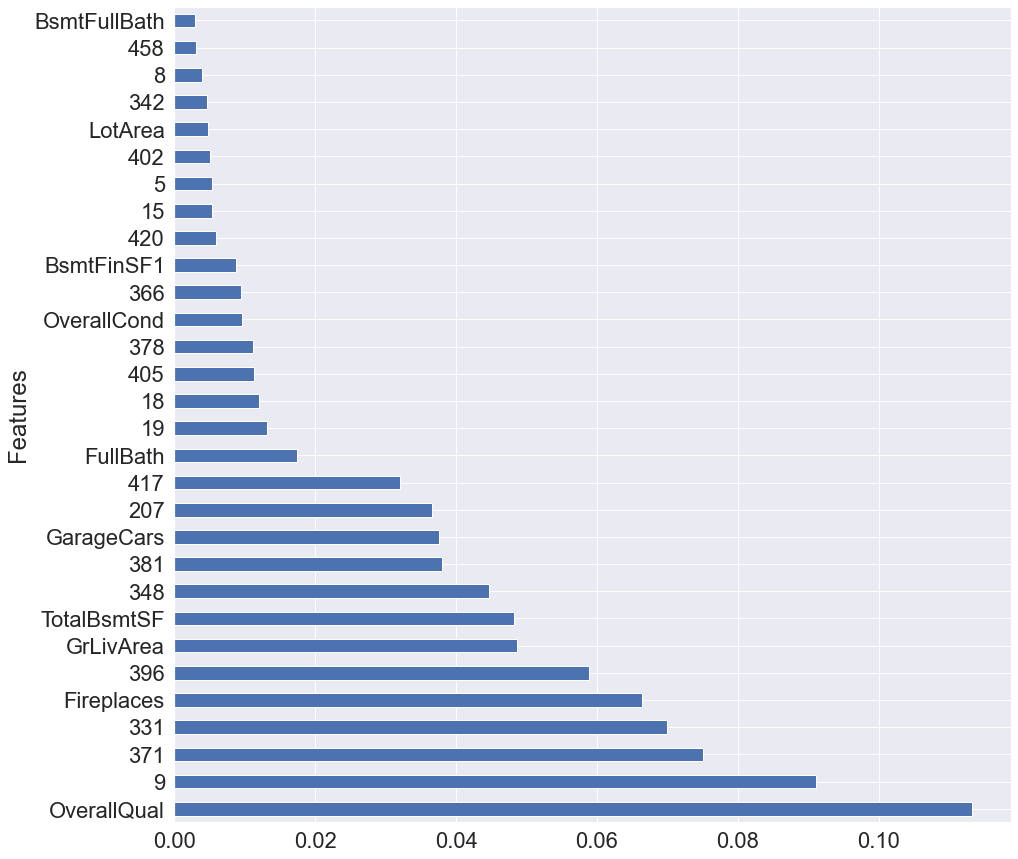

In [494]:
pd.DataFrame({'Features':train_en_df.columns,'Importance':final_model.feature_importances_.tolist()}).sort_values('Importance', ascending=False).head(30).plot(kind='barh', x='Features', y='Importance', legend=False, figsize=(15, 15))

# The OverallQual, Fireplaces, GrLivArea, TotalBsmtSF, GarageCars, FullBath, OverallCond, BsmtFinSF1, LotArea, BsmtFullBath are the most influential Features on the SalePrice.